<h1 style="color:#1a8cff;"><center>House Price Prediction</center></h1>

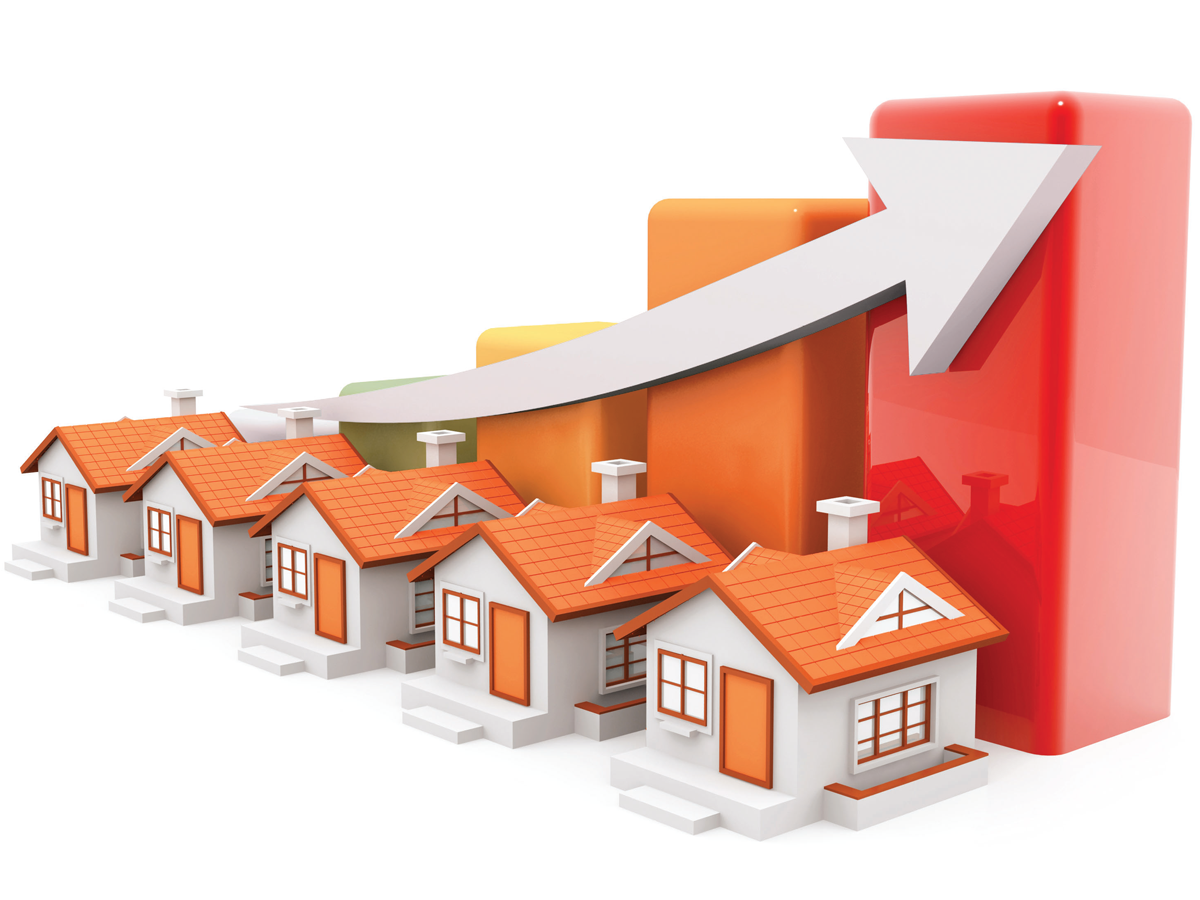
### Problem Statement:
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. The company is looking at prospective properties to buy to enter the market and it wants to know:
1. Which features are significant in predicting the price of a house
2. How well those features describe the price of a house

## 1. Data Understanding, Exploration & Cleaning

Let's first have a look at the dataset and understand the size, attribute names etc.

In [4128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [4129]:
# Reading the dataset
house = pd.read_csv("train.csv")

In [4130]:
# Summary of the dataset: 1460 rows, 81 columns
print(house.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4131]:
# Head
house.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [4132]:
# Check the count of columns having NULL values
null_cols_count = len(house.columns) - house.notnull().any().sum()
print("Total number of columns having NO/NULL values:", null_cols_count)

# Check the count of columns with missing values
missing_val_cols_count = len(house.columns[house.isnull().any()]) - null_cols_count
print("Total number of columns having missing values:", missing_val_cols_count)

# Columns with NULL and missing values
missing_col_names = house.columns[house.isnull().any()]
print(missing_col_names)

Total number of columns having NO/NULL values: 0
Total number of columns having missing values: 19
Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')


In [4133]:
# Checking the percentage of missing values in each column
dict(house.isnull().sum()/len(house.index)*100)

{'Id': 0.0,
 'MSSubClass': 0.0,
 'MSZoning': 0.0,
 'LotFrontage': 17.73972602739726,
 'LotArea': 0.0,
 'Street': 0.0,
 'Alley': 93.76712328767123,
 'LotShape': 0.0,
 'LandContour': 0.0,
 'Utilities': 0.0,
 'LotConfig': 0.0,
 'LandSlope': 0.0,
 'Neighborhood': 0.0,
 'Condition1': 0.0,
 'Condition2': 0.0,
 'BldgType': 0.0,
 'HouseStyle': 0.0,
 'OverallQual': 0.0,
 'OverallCond': 0.0,
 'YearBuilt': 0.0,
 'YearRemodAdd': 0.0,
 'RoofStyle': 0.0,
 'RoofMatl': 0.0,
 'Exterior1st': 0.0,
 'Exterior2nd': 0.0,
 'MasVnrType': 0.547945205479452,
 'MasVnrArea': 0.547945205479452,
 'ExterQual': 0.0,
 'ExterCond': 0.0,
 'Foundation': 0.0,
 'BsmtQual': 2.5342465753424657,
 'BsmtCond': 2.5342465753424657,
 'BsmtExposure': 2.6027397260273974,
 'BsmtFinType1': 2.5342465753424657,
 'BsmtFinSF1': 0.0,
 'BsmtFinType2': 2.6027397260273974,
 'BsmtFinSF2': 0.0,
 'BsmtUnfSF': 0.0,
 'TotalBsmtSF': 0.0,
 'Heating': 0.0,
 'HeatingQC': 0.0,
 'CentralAir': 0.0,
 'Electrical': 0.0684931506849315,
 '1stFlrSF': 0.0,
 '2

In [4134]:
# Deleting the columns having more than 50% missing values and check the shape
cols_to_be_del = house.columns[(house.isnull().sum() / len(house.index) * 100) > 50]
house = house.drop(cols_to_be_del, axis = 1)
house.shape

(1460, 77)

In [4135]:
# Outlier check
house.describe(percentiles=[.25,.5,.75,.90,.95,.99])

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
90%    1314.100000   120.000000    96.000000   14381.700000     8.000000   
95%    1387.050000   160.000000   107.000000   17401.150000     8.000000   
99%    1445.410000   190.000000   141.000000   37567.640000    10.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
90%       7.000000  2006.000000   2006.000000   335.000000  1065.500000  ...   
95%       8.000000  2007.000000   2007.000000   456.000000  1274.000000  ...   
99%       9.000000  2009.000000   2009.000000   791.920000  1572.410000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
90%     262.000000   130.000000     112.000000     0.000000     0.000000   
95%     335.000000   175.050000     180.150000     0.000000   160.000000   
99%     505.460000   285.820000     261.050000   168.000000   268.050000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
90%       0.000000      0.000000    10.000000  2010.000000  278000.000000  
95%       0.000000      0.000000    11.000000  2010.000000  326100.000000  
99%       0.000000    700.000000    12.000000  2010.000000  442567.010000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[11 rows x 38 columns]

In [4136]:
# Impute Numerical features:
#" LotFrontage" with similar Neighborhood values
house['LotFrontage'] = house.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
house['LotFrontage'].describe()

count    1460.000000
mean       70.199658
std        22.431902
min        21.000000
25%        60.000000
50%        70.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [4137]:
# "GarageYrBlt" with Median values
house['GarageYrBlt'].fillna(house["GarageYrBlt"].median(), inplace=True)
house['GarageYrBlt'].describe()

count    1460.000000
mean     1978.589041
std        23.997022
min      1900.000000
25%      1962.000000
50%      1980.000000
75%      2001.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

In [4138]:
# Recheck the percentage of missing values in each column
dict(house.isnull().sum()/len(house.index)*100)

{'Id': 0.0,
 'MSSubClass': 0.0,
 'MSZoning': 0.0,
 'LotFrontage': 0.0,
 'LotArea': 0.0,
 'Street': 0.0,
 'LotShape': 0.0,
 'LandContour': 0.0,
 'Utilities': 0.0,
 'LotConfig': 0.0,
 'LandSlope': 0.0,
 'Neighborhood': 0.0,
 'Condition1': 0.0,
 'Condition2': 0.0,
 'BldgType': 0.0,
 'HouseStyle': 0.0,
 'OverallQual': 0.0,
 'OverallCond': 0.0,
 'YearBuilt': 0.0,
 'YearRemodAdd': 0.0,
 'RoofStyle': 0.0,
 'RoofMatl': 0.0,
 'Exterior1st': 0.0,
 'Exterior2nd': 0.0,
 'MasVnrType': 0.547945205479452,
 'MasVnrArea': 0.547945205479452,
 'ExterQual': 0.0,
 'ExterCond': 0.0,
 'Foundation': 0.0,
 'BsmtQual': 2.5342465753424657,
 'BsmtCond': 2.5342465753424657,
 'BsmtExposure': 2.6027397260273974,
 'BsmtFinType1': 2.5342465753424657,
 'BsmtFinSF1': 0.0,
 'BsmtFinType2': 2.6027397260273974,
 'BsmtFinSF2': 0.0,
 'BsmtUnfSF': 0.0,
 'TotalBsmtSF': 0.0,
 'Heating': 0.0,
 'HeatingQC': 0.0,
 'CentralAir': 0.0,
 'Electrical': 0.0684931506849315,
 '1stFlrSF': 0.0,
 '2ndFlrSF': 0.0,
 'LowQualFinSF': 0.0,
 'GrLi

In [4139]:
# Re-check the count of columns with missing values
missing_val_col_count = house.isnull().any().sum()
missing_val_col_count

13

In [4140]:
# Drop rows where the missing percentage is quite high
# Total number of rows containing NULL values
missing_rows_count = house[house.isnull().any(axis=1)].shape[0]

# Rows with missing values
missing_val_rows = house[house.isnull().any(axis=1)]

print('\n Missing values in rows:', missing_rows_count)
print('\n Rows:')
print(missing_val_rows)


 Missing values in rows: 713

 Rows:
        Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
0        1          60       RL         65.0     8450   Pave      Reg   
5        6          50       RL         85.0    14115   Pave      IR1   
10      11          20       RL         70.0    11200   Pave      Reg   
12      13          20       RL         71.0    12968   Pave      IR2   
15      16          45       RM         51.0     6120   Pave      Reg   
17      18          90       RL         72.0    10791   Pave      Reg   
18      19          20       RL         66.0    13695   Pave      Reg   
19      20          20       RL         70.0     7560   Pave      Reg   
26      27          20       RL         60.0     7200   Pave      Reg   
29      30          30       RM         60.0     6324   Pave      IR1   
30      31          70  C (all)         50.0     8500   Pave      Reg   
31      32          20       RL         71.0     8544   Pave      IR1   
32      33   

In [4141]:
# Check the count of rows having more than 14 missing values
len(house[house.isnull().sum(axis=1) > missing_val_col_count])

0

In [4142]:
# Display the shape
house.shape

(1460, 77)

<h4>The target feature/column is <span style="color:Green;"><b>SalePrice</b></span></h4>

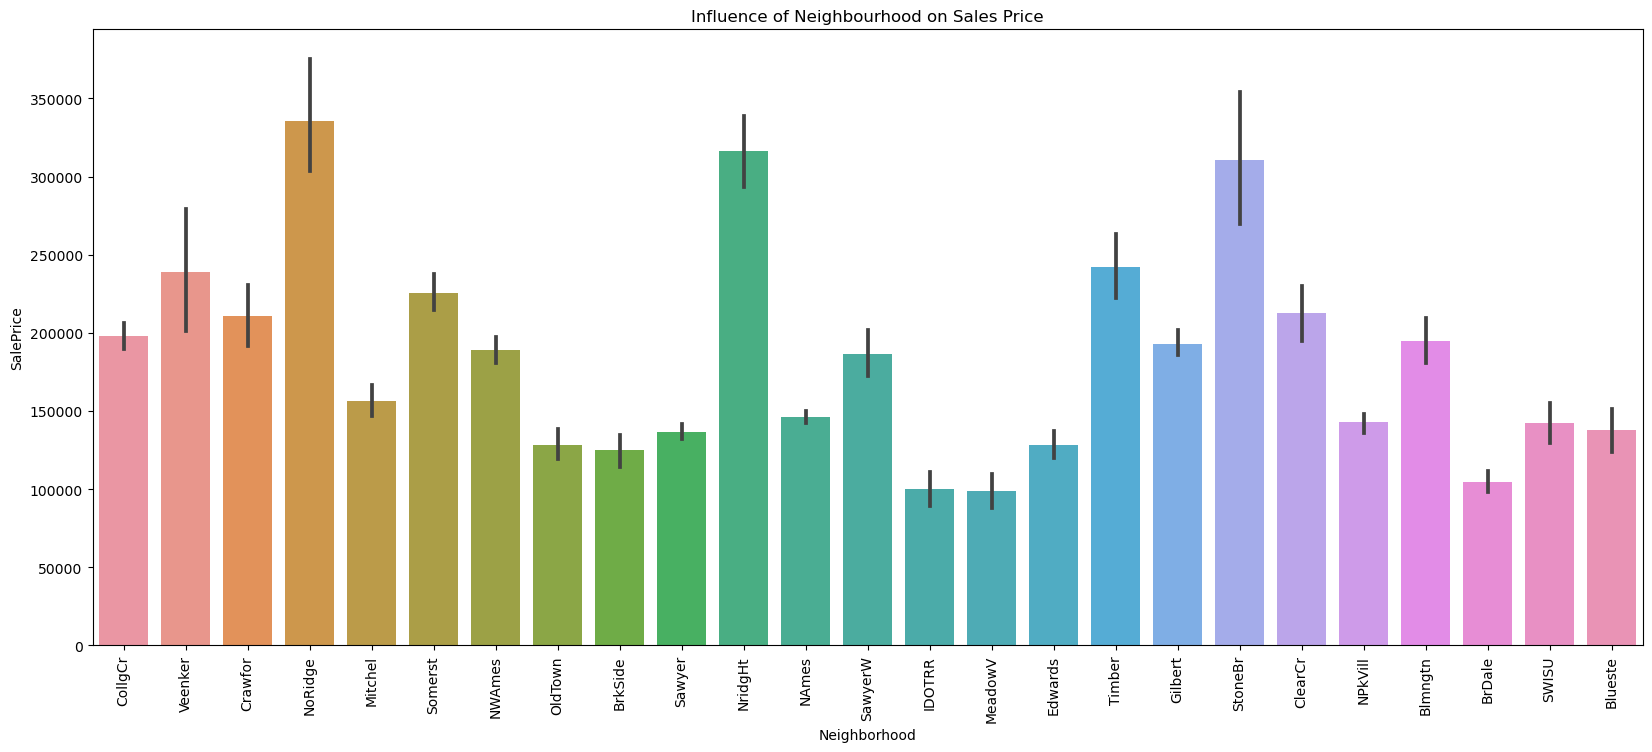

In [4143]:
# Plot to show influence of 'Neighborhood' on'Sale Price'

plt.figure(figsize=(20, 8))
sns.barplot(x="Neighborhood", y="SalePrice", data = house)
plt.title("Influence of Neighbourhood on Sales Price")
plt.xticks(rotation=90)
plt.show()

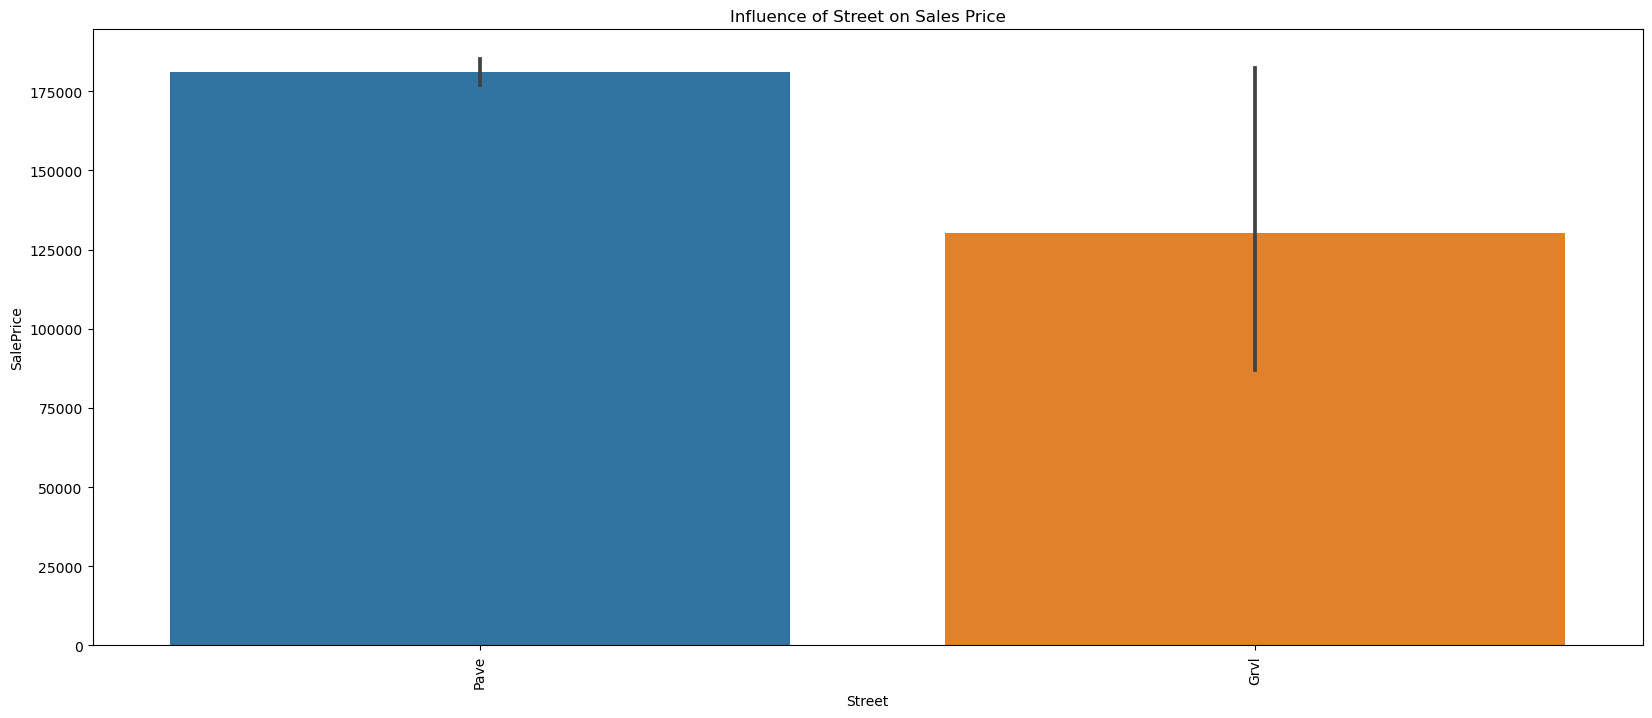

In [4144]:
# Plot to show influence of 'Street' on'Sale Price'

plt.figure(figsize=(20, 8))
sns.barplot(x="Street", y="SalePrice", data = house)
plt.title("Influence of Street on Sales Price")
plt.xticks(rotation=90)
plt.show()

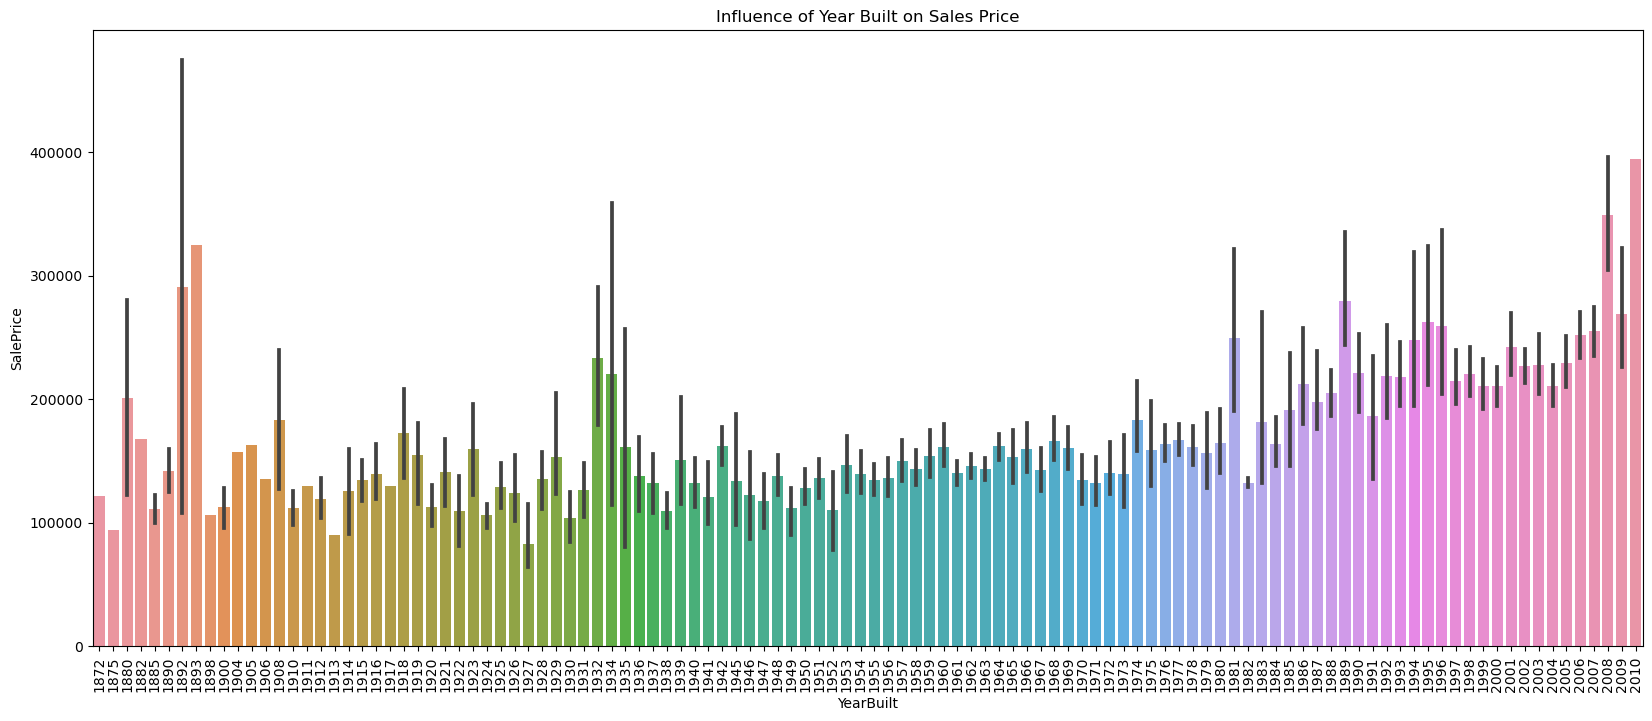

In [4145]:
# Plot to show influence of 'YearBuilt' on'Sale Price'

plt.figure(figsize=(20, 8))
sns.barplot(x="YearBuilt", y="SalePrice", data = house)
plt.title("Influence of Year Built on Sales Price")
plt.xticks(rotation=90)
plt.show()

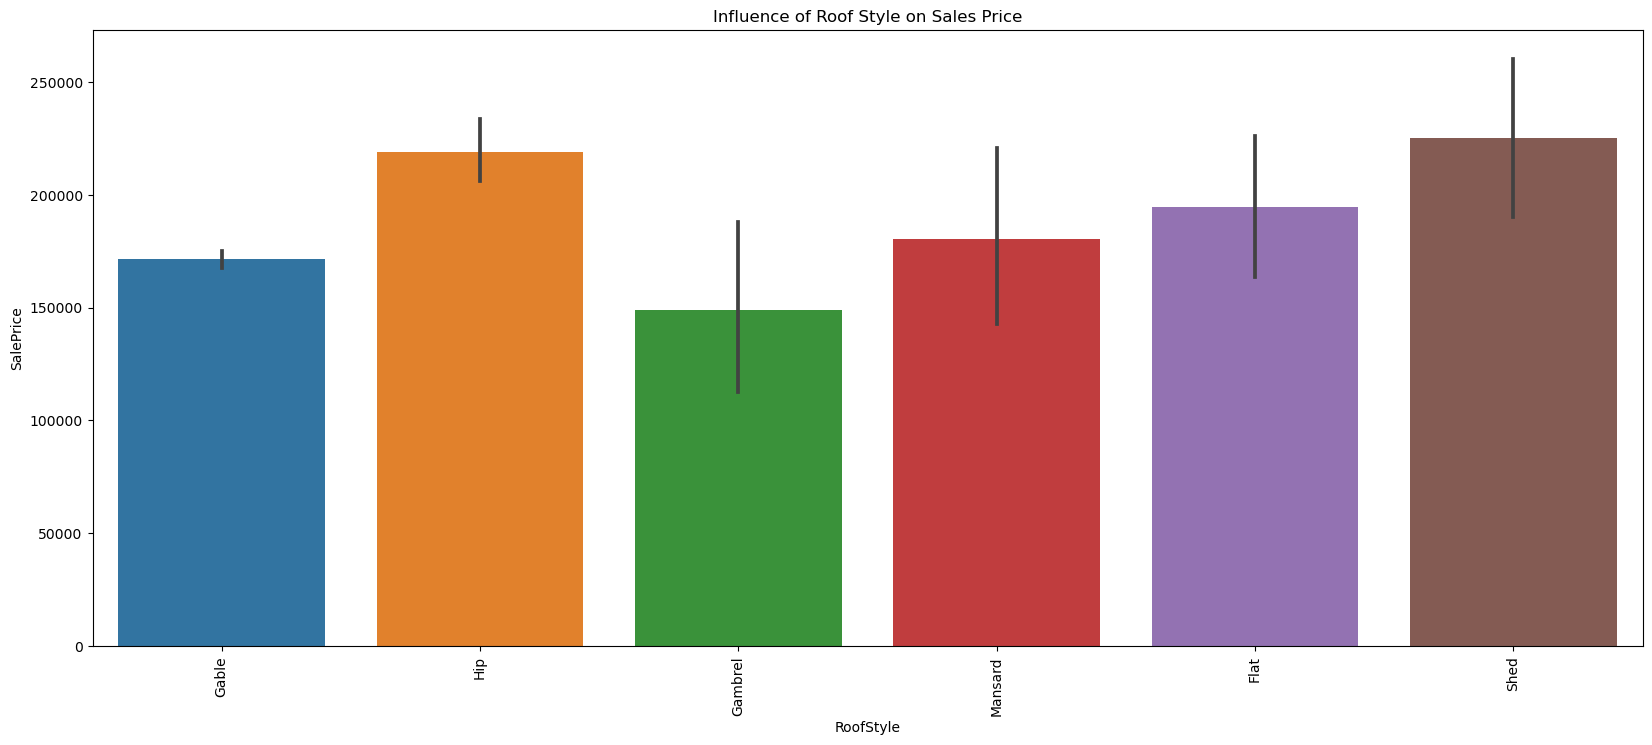

In [4146]:
# Plot to show influence of 'RoofStyle' on'Sale Price'

plt.figure(figsize=(20, 8))
sns.barplot(x="RoofStyle", y="SalePrice", data = house)
plt.title("Influence of Roof Style on Sales Price")
plt.xticks(rotation=90)
plt.show()

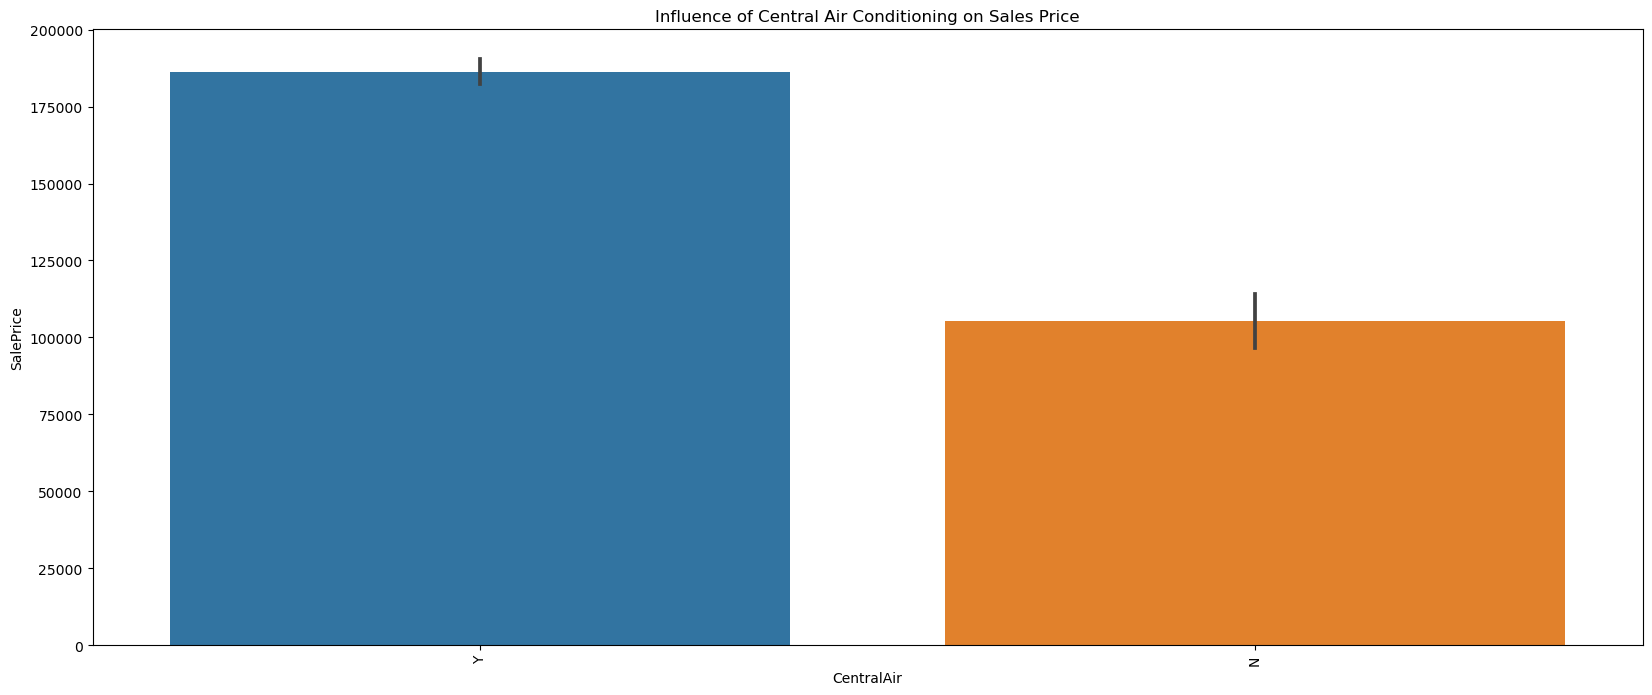

In [4147]:
# Plot to show influence of 'CentralAir' on'Sale Price'

plt.figure(figsize=(20, 8))
sns.barplot(x="CentralAir", y="SalePrice", data = house)
plt.title("Influence of Central Air Conditioning on Sales Price")
plt.xticks(rotation=90)
plt.show()

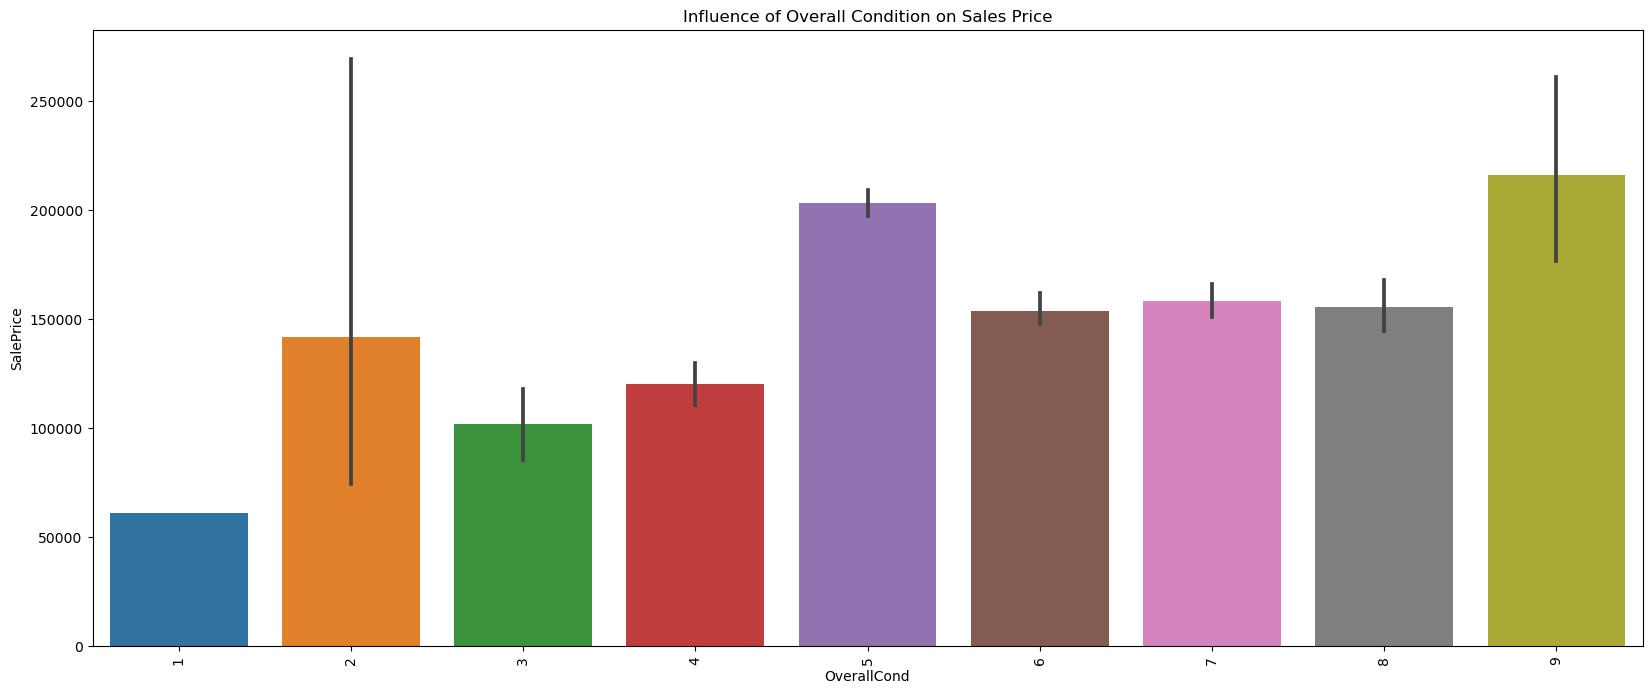

In [4148]:
# Plot to show influence of 'OverallCond' on'Sale Price'

plt.figure(figsize=(20, 8))
sns.barplot(x="OverallCond", y="SalePrice", data = house)
plt.title("Influence of Overall Condition on Sales Price")
plt.xticks(rotation=90)
plt.show()

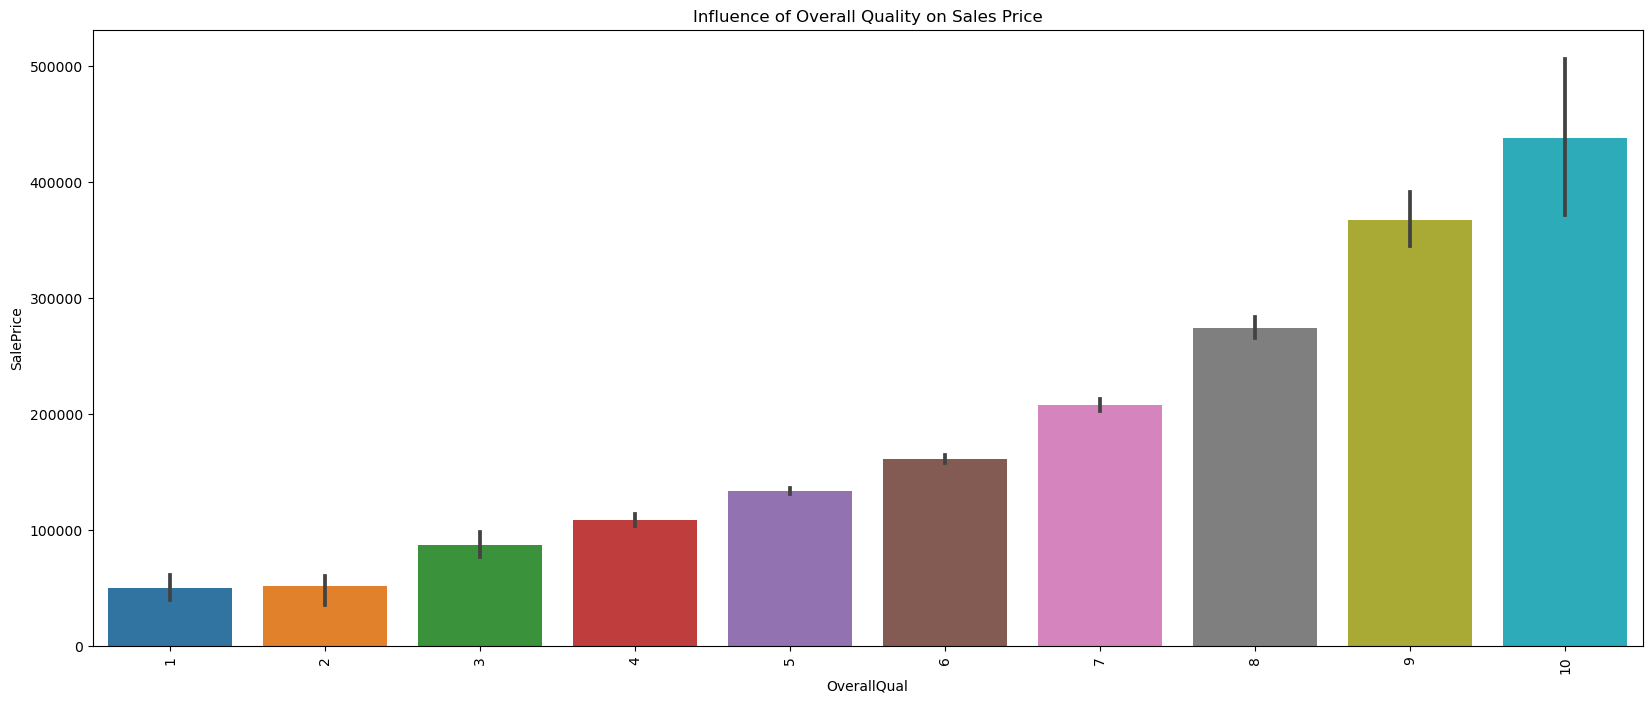

In [4149]:
# Plot to show influence of 'OverallQual' on'Sale Price'

plt.figure(figsize=(20, 8))
sns.barplot(x="OverallQual", y="SalePrice", data = house)
plt.title("Influence of Overall Quality on Sales Price")
plt.xticks(rotation=90)
plt.show()

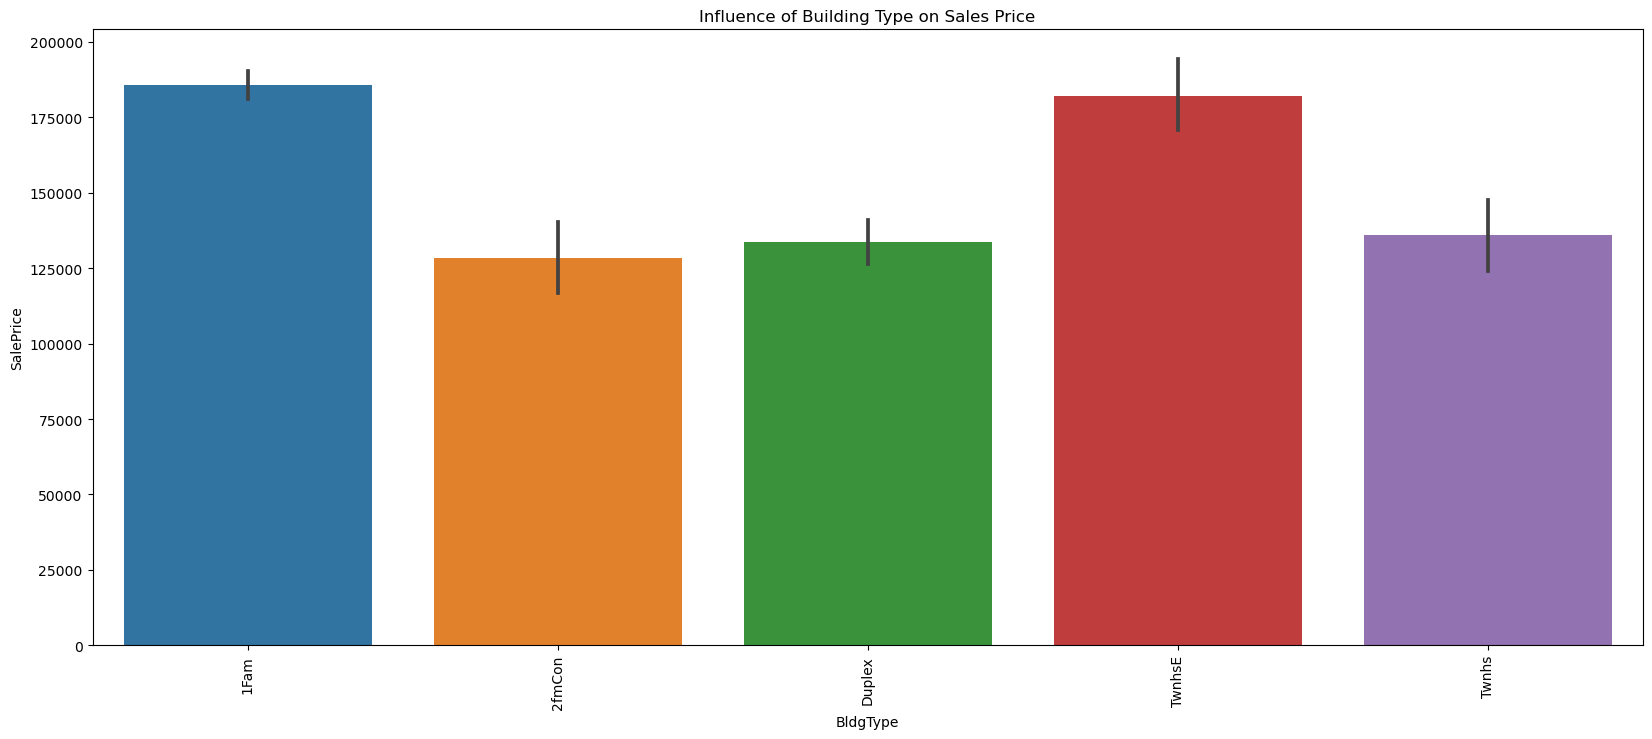

In [4150]:
# Plot to show influence of 'BldgType' on'Sale Price'

plt.figure(figsize=(20, 8))
sns.barplot(x="BldgType", y="SalePrice", data = house)
plt.title("Influence of Building Type on Sales Price")
plt.xticks(rotation=90)
plt.show()

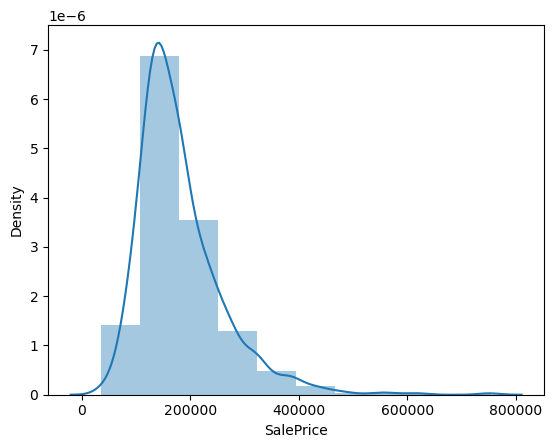

In [4151]:
# Distribution plot to check the spread of Sales Price

sns.distplot(house['SalePrice'], bins=10)
plt.show()

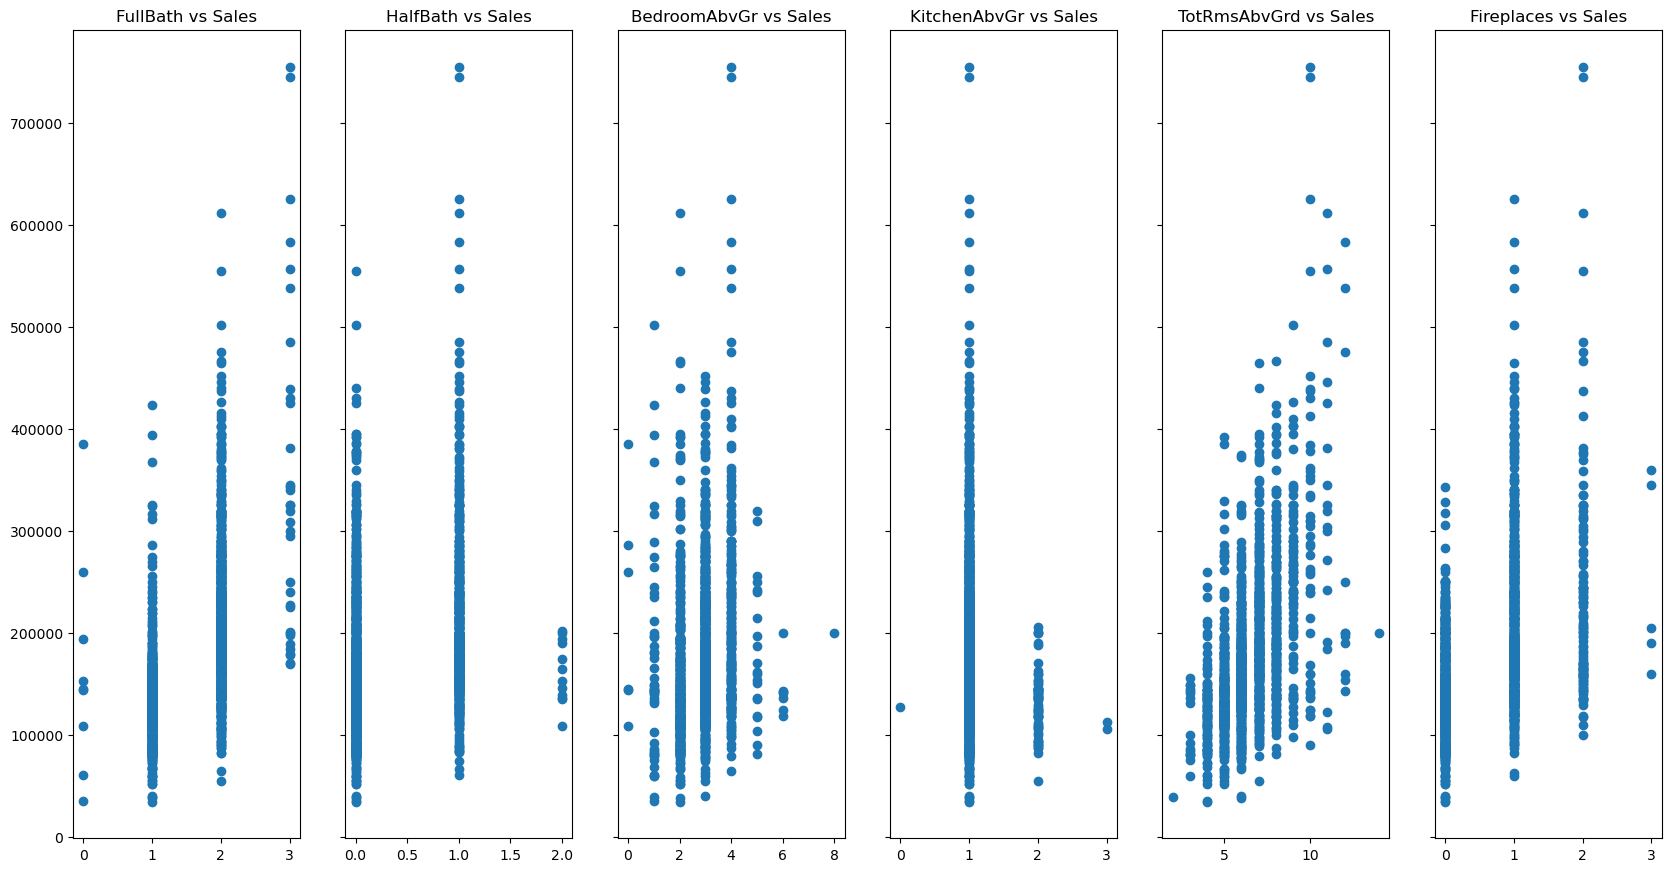

In [4152]:
# Sub-Plots to check the distribution of few more features

fig, ax = plt.subplots(ncols=6, sharey=True)

FullBath = ax[0].scatter(house['FullBath'], house['SalePrice'])
FullBath.set_label("FullBath")
ax[0].set_title('FullBath vs Sales')

HalfBath= ax[1].scatter(house['HalfBath'], house['SalePrice'])
HalfBath.set_label("HalfBath")
ax[1].set_title('HalfBath vs Sales')

BedroomAbvGr = ax[2].scatter(house['BedroomAbvGr'], house['SalePrice'])
BedroomAbvGr.set_label("BedroomAbvGr")
ax[2].set_title('BedroomAbvGr vs Sales')

KitchenAbvGr = ax[3].scatter(house['KitchenAbvGr'], house['SalePrice'])
KitchenAbvGr.set_label("KitchenAbvGr")
ax[3].set_title('KitchenAbvGr vs Sales')

TotRmsAbvGrd = ax[4].scatter(house['TotRmsAbvGrd'], house['SalePrice'])
TotRmsAbvGrd.set_label("TotRmsAbvGrd")
ax[4].set_title('TotRmsAbvGrd vs Sales')

Fireplaces = ax[5].scatter(house['Fireplaces'], house['SalePrice'])
Fireplaces.set_label("Fireplaces")
ax[5].set_title('Fireplaces vs Sales')

fig.set_size_inches(20.5, 10.5, forward=True)

plt.show()

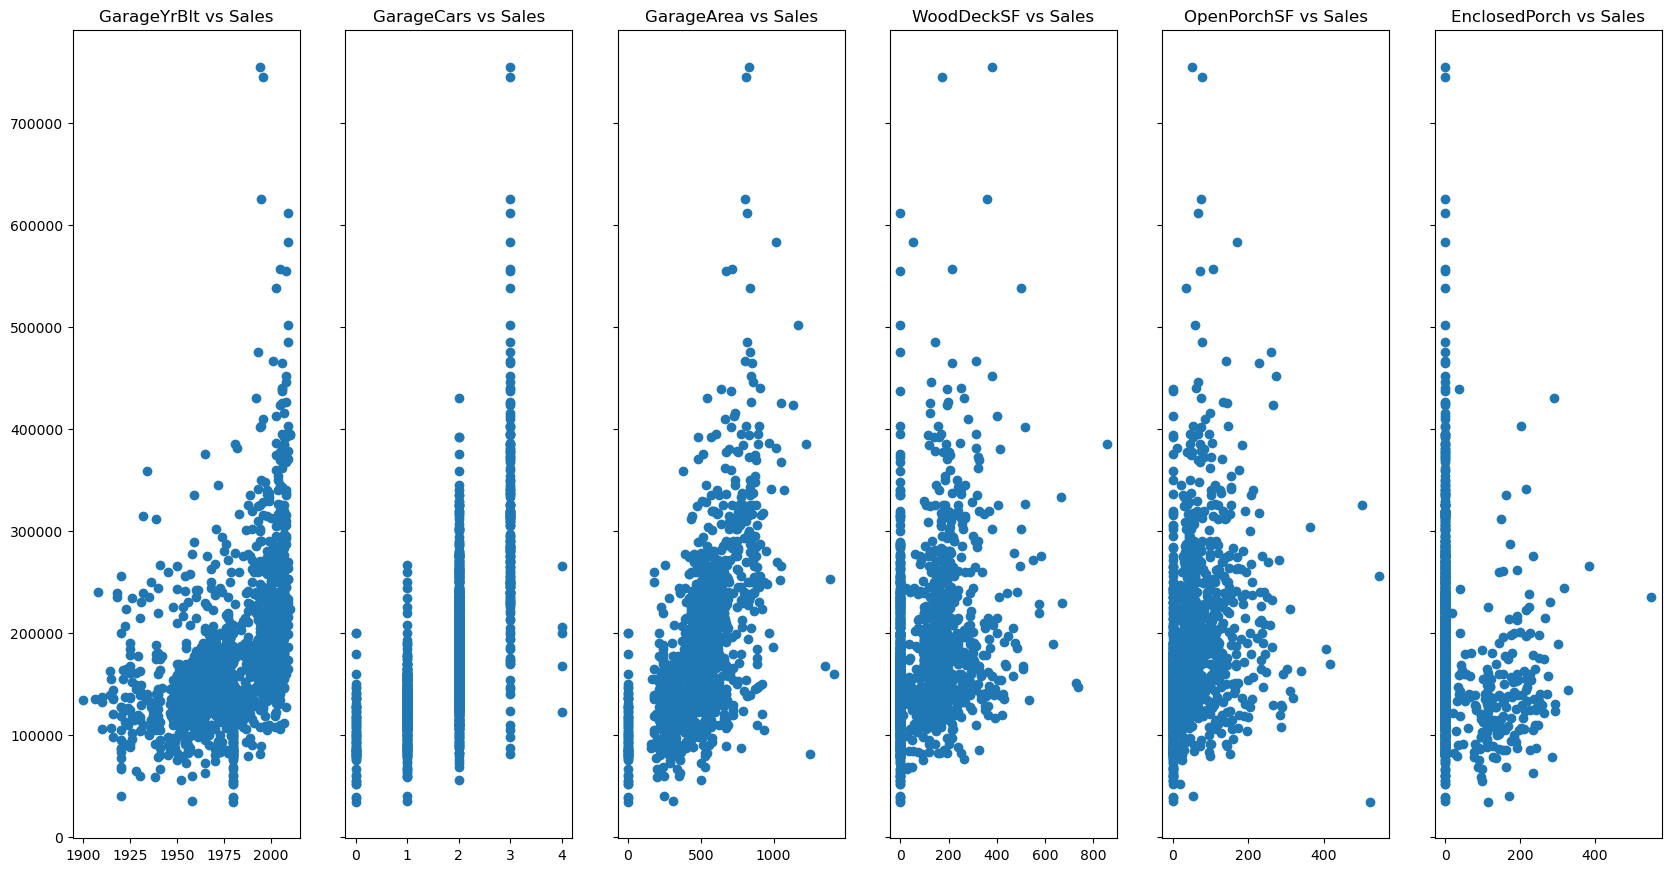

In [4153]:
fig, ax = plt.subplots(ncols=6, sharey=True)

GarageYrBlt = ax[0].scatter(house['GarageYrBlt'], house['SalePrice'])
GarageYrBlt.set_label("GarageYrBlt")
ax[0].set_title('GarageYrBlt vs Sales')

GarageCars= ax[1].scatter(house['GarageCars'], house['SalePrice'])
GarageCars.set_label("GarageCars")
ax[1].set_title('GarageCars vs Sales')

GarageArea = ax[2].scatter(house['GarageArea'], house['SalePrice'])
GarageArea.set_label("GarageArea")
ax[2].set_title('GarageArea vs Sales')

WoodDeckSF = ax[3].scatter(house['WoodDeckSF'], house['SalePrice'])
WoodDeckSF.set_label("WoodDeckSF")
ax[3].set_title('WoodDeckSF vs Sales')

OpenPorchSF = ax[4].scatter(house['OpenPorchSF'], house['SalePrice'])
OpenPorchSF.set_label("OpenPorchSF")
ax[4].set_title('OpenPorchSF vs Sales')

EnclosedPorch = ax[5].scatter(house['EnclosedPorch'], house['SalePrice'])
EnclosedPorch.set_label("EnclosedPorch")
ax[5].set_title('EnclosedPorch vs Sales')

fig.set_size_inches(20.5, 10.5, forward=True)

plt.show()

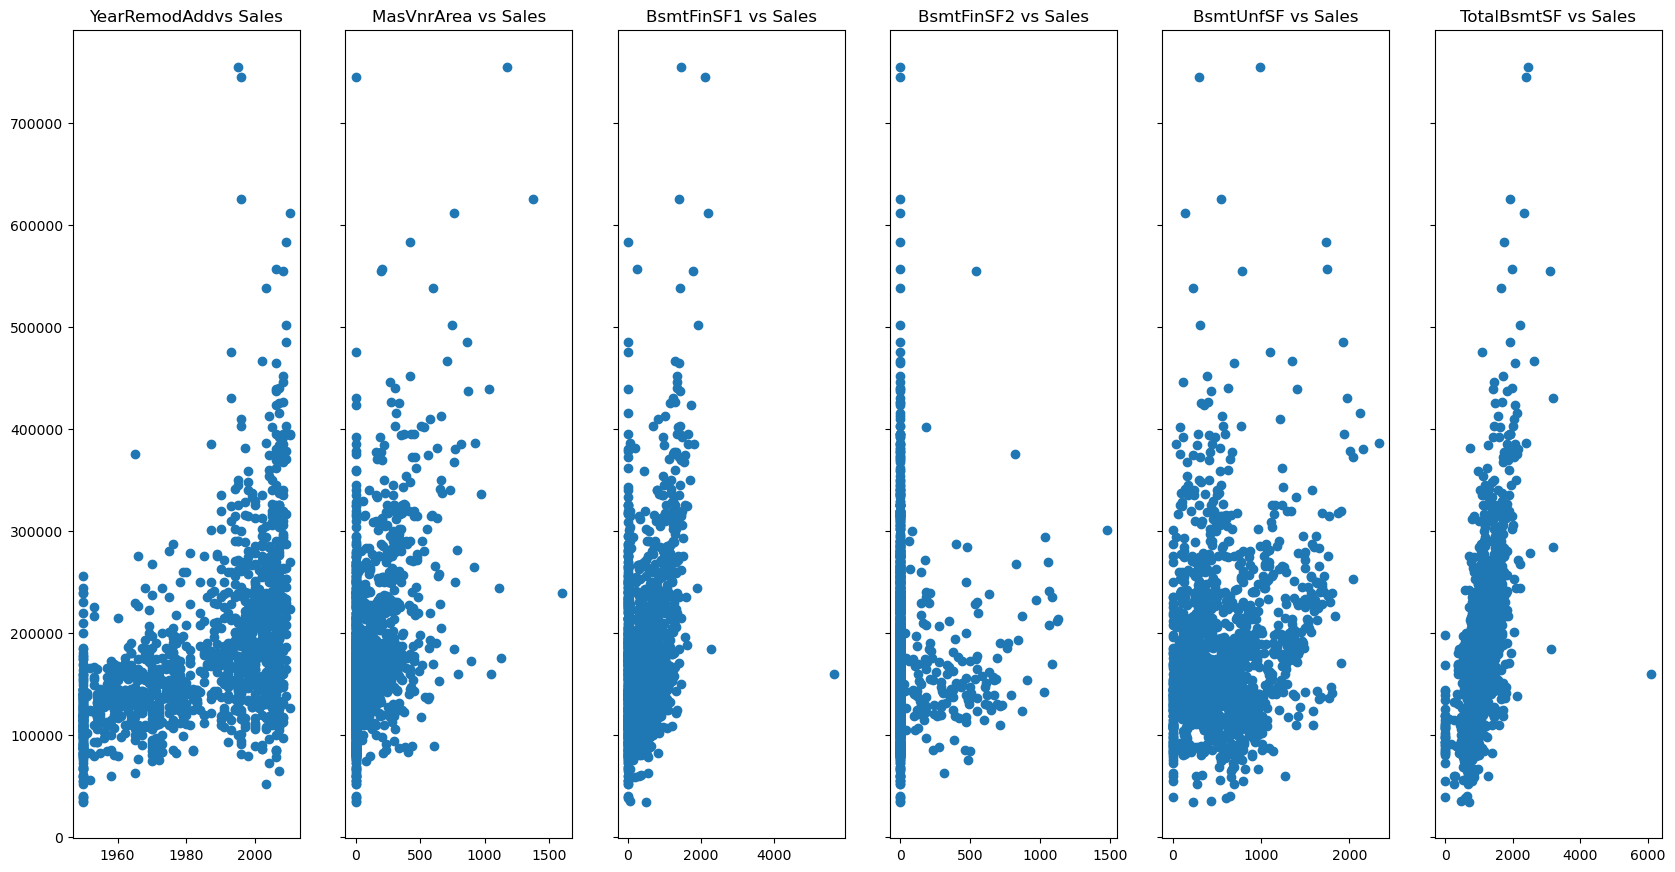

In [4154]:
fig, ax = plt.subplots(ncols=6, sharey=True)

YearRemodAdd = ax[0].scatter(house['YearRemodAdd'], house['SalePrice'])
YearRemodAdd.set_label("YearRemodAdd")
ax[0].set_title('YearRemodAddvs Sales')

MasVnrArea= ax[1].scatter(house['MasVnrArea'], house['SalePrice'])
MasVnrArea.set_label("MasVnrArea")
ax[1].set_title('MasVnrArea vs Sales')

BsmtFinSF1 = ax[2].scatter(house['BsmtFinSF1'], house['SalePrice'])
BsmtFinSF1.set_label("BsmtFinSF1")
ax[2].set_title('BsmtFinSF1 vs Sales')

BsmtFinSF2 = ax[3].scatter(house['BsmtFinSF2'], house['SalePrice'])
BsmtFinSF2.set_label("BsmtFinSF2")
ax[3].set_title('BsmtFinSF2 vs Sales')

BsmtUnfSF = ax[4].scatter(house['BsmtUnfSF'], house['SalePrice'])
BsmtUnfSF.set_label("BsmtUnfSF")
ax[4].set_title('BsmtUnfSF vs Sales')

TotalBsmtSF = ax[5].scatter(house['TotalBsmtSF'], house['SalePrice'])
TotalBsmtSF.set_label("TotalBsmtSF")
ax[5].set_title('TotalBsmtSF vs Sales')

fig.set_size_inches(20.5, 10.5, forward=True)

plt.show()

In [4155]:
# Prepare numeric columns only dataframe

numeric_cols = house.select_dtypes(include=['float64', 'int64'])
numeric_cols.head()

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  OpenPorchSF  \
0          2003       196.0         706  ...           0           61   
1          1976         0.0         978  ...         298            0   
2          2002       162.0         486  ...           0           42   
3          1970         0.0         216  ...           0           35   
4          2000       350.0         655  ...         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000  

[5 rows x 38 columns]

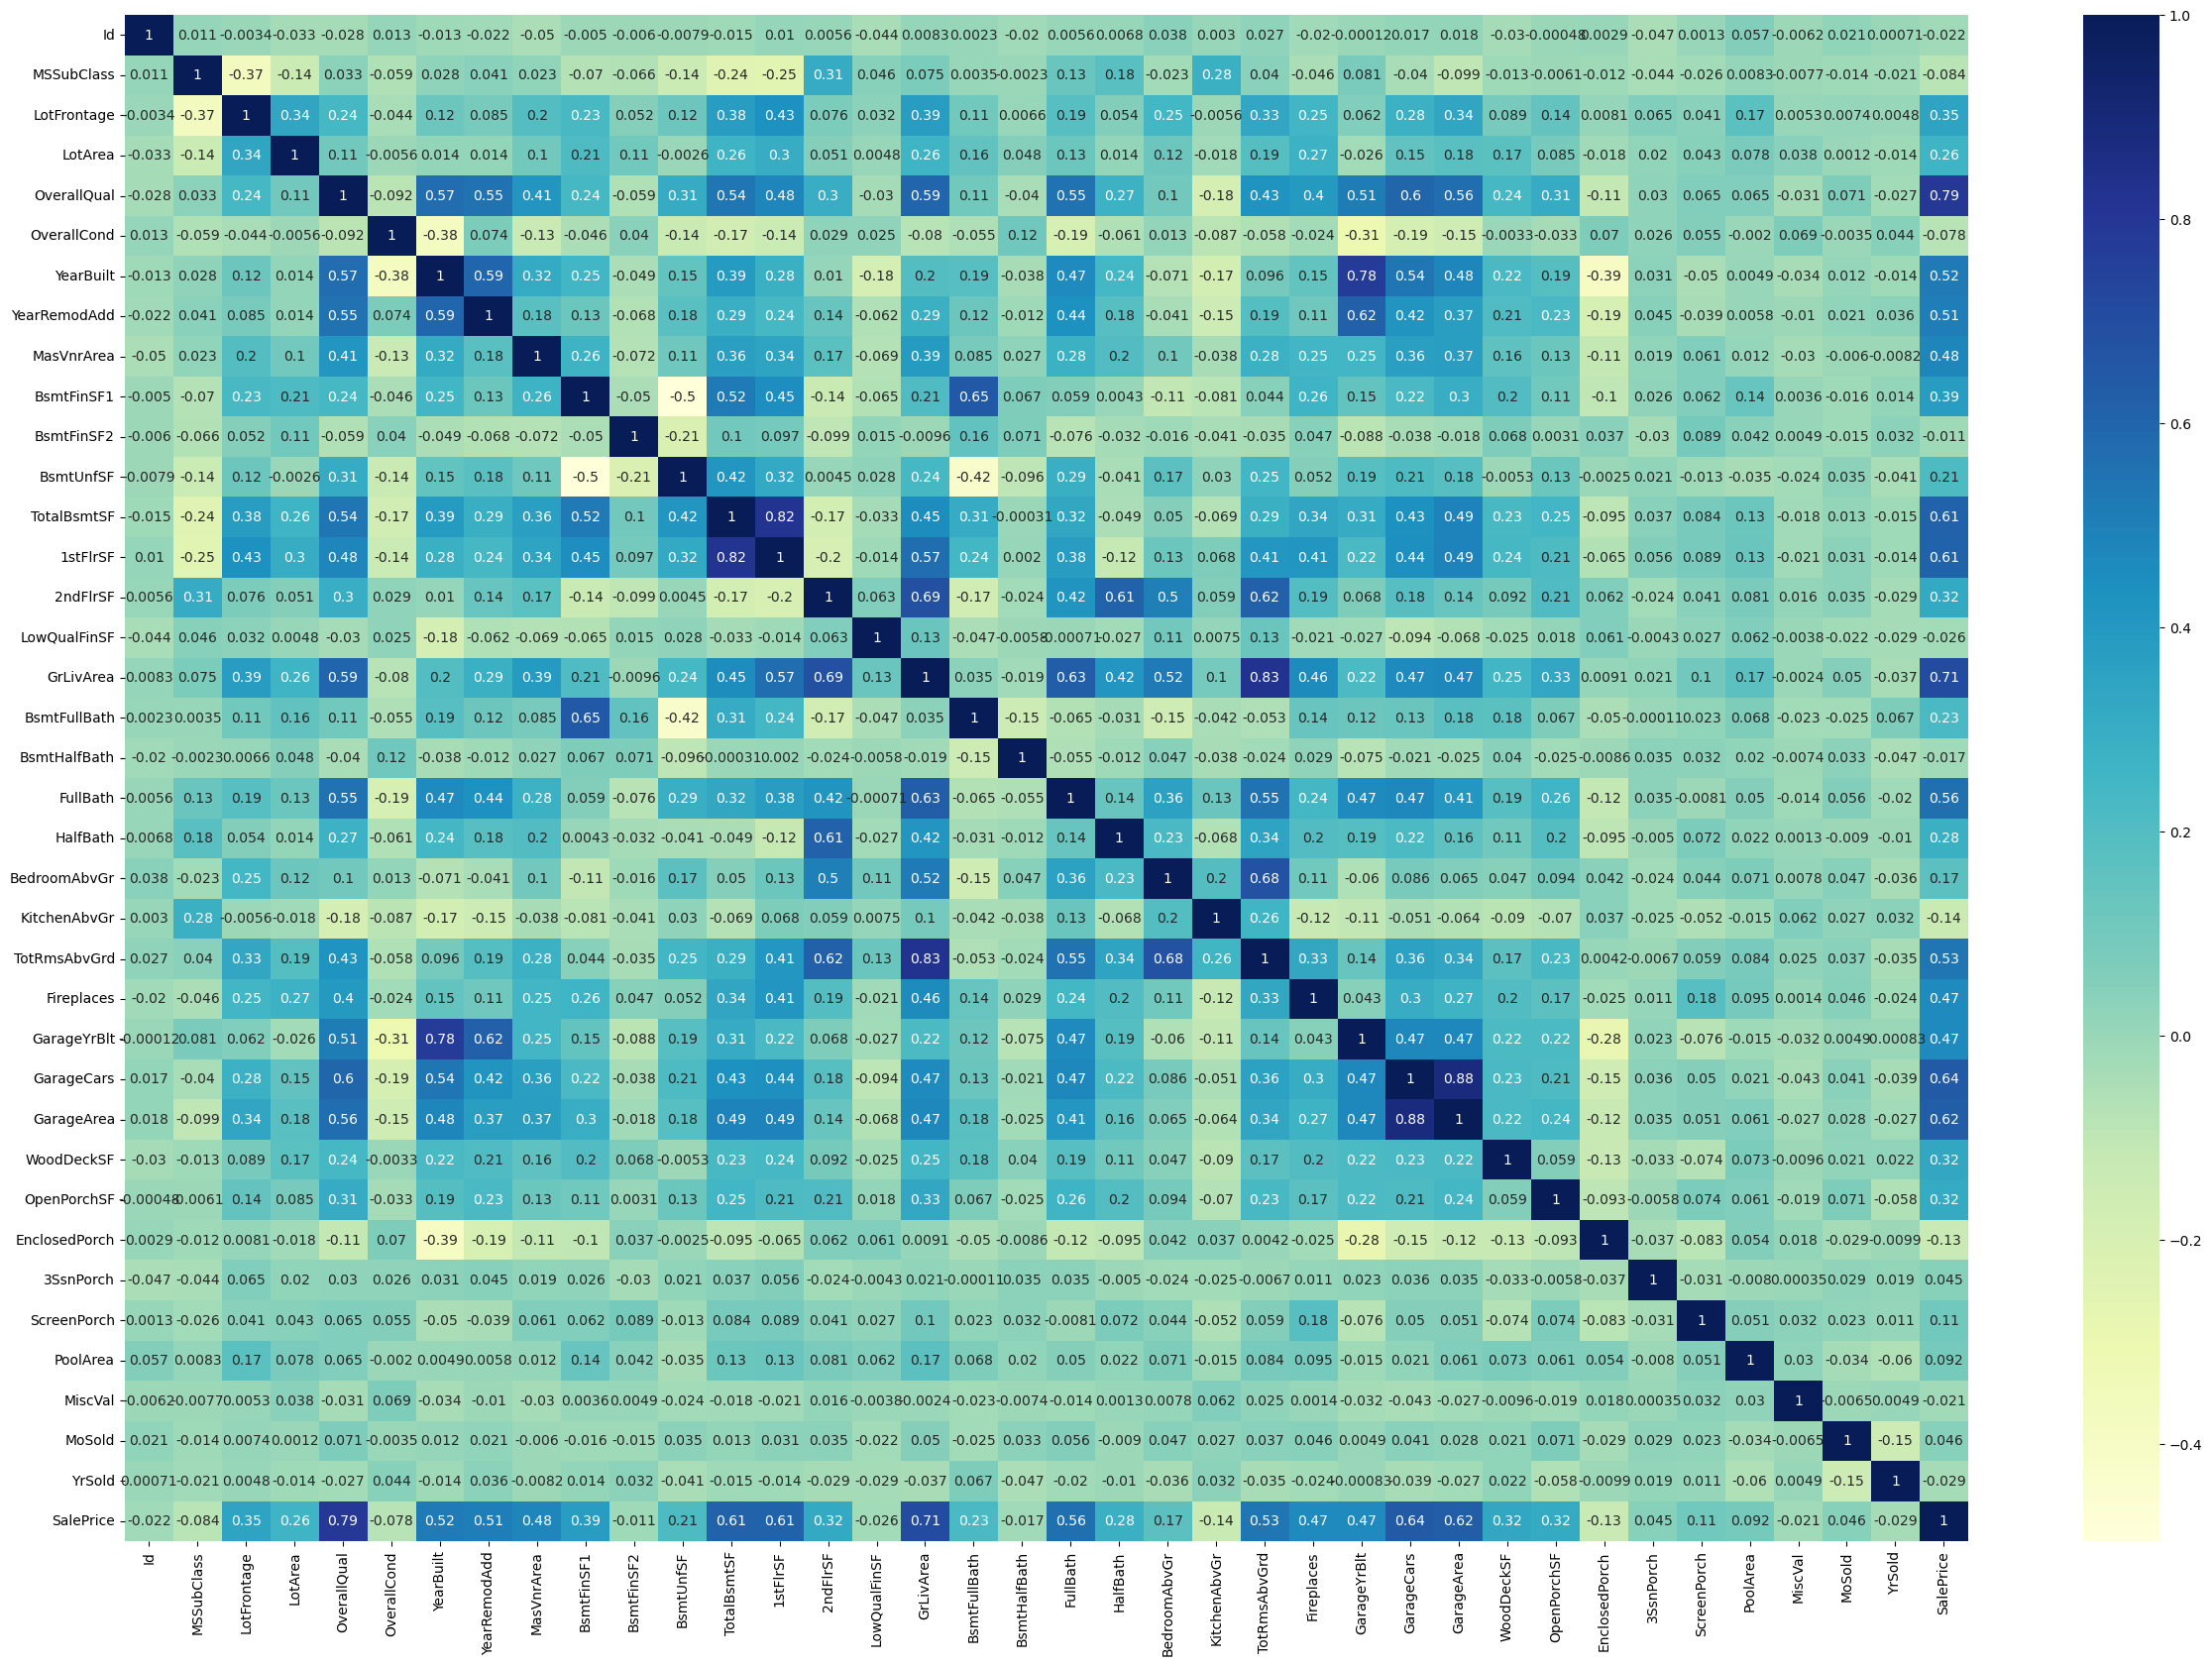

In [4156]:
# Plot to check the correlations

plt.figure(figsize=(30,20))

# Heatmap
sns.heatmap(numeric_cols.corr(), cmap="YlGnBu", annot=True)
plt.show()

## 2. Data Preparation

In [4157]:
# Drop the Columns that are highly correlated

# 'Id' has no significance w.r.t to Sales price
house.drop(['Id'], axis=1, inplace=True)

house.drop(['BsmtUnfSF'], axis=1, inplace=True)
house.drop(['GarageCars'], axis=1, inplace=True)
house.drop(['GarageYrBlt'], axis=1, inplace=True)
house.drop(['TotalBsmtSF'], axis=1, inplace=True)
house.drop(['TotRmsAbvGrd'], axis=1, inplace=True)
house.shape

(1460, 71)

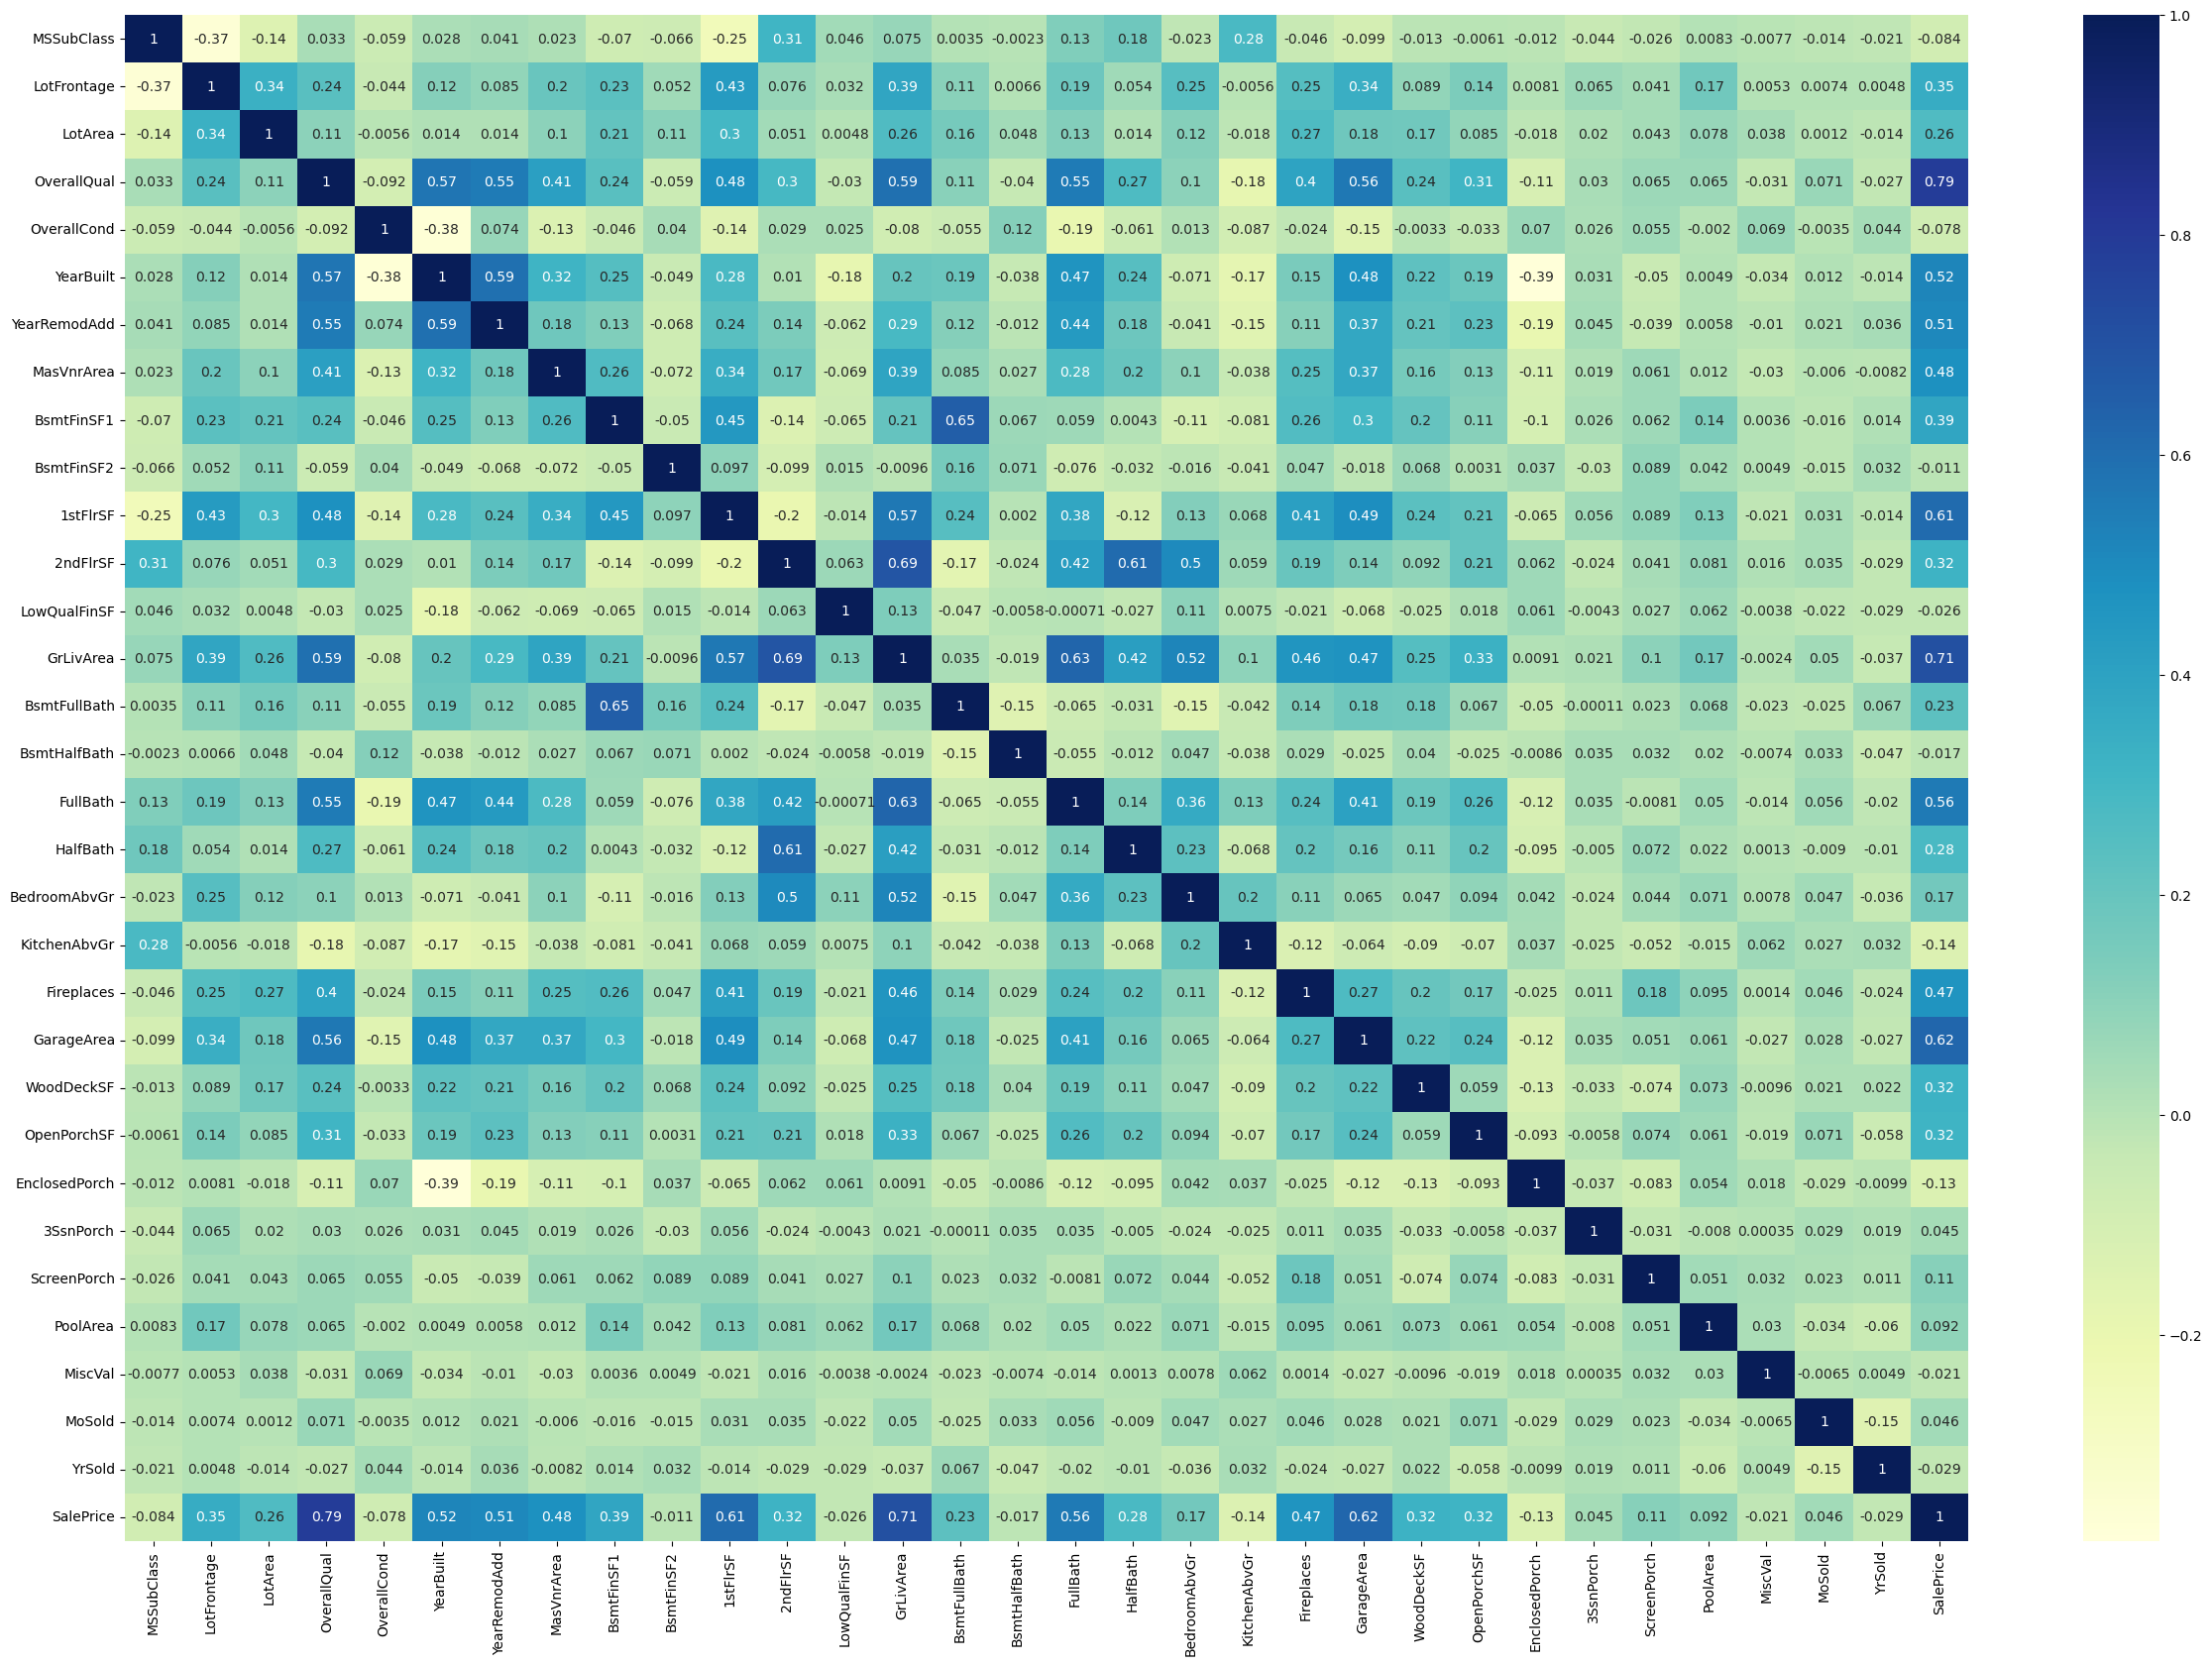

In [4158]:
# Heatmap

numeric_cols = house.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(30,20))
sns.heatmap(numeric_cols.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [4159]:
# Dropping few more features based on the correlation values shown in the previous heatmap

house.drop(['MoSold'], axis=1, inplace=True)
house.drop(['YrSold'], axis=1, inplace=True)
house.drop(['YearBuilt'], axis=1, inplace=True)
house.drop(['YearRemodAdd'], axis=1, inplace=True)
house.drop(['MiscVal'], axis=1, inplace=True)
house.shape

(1460, 66)

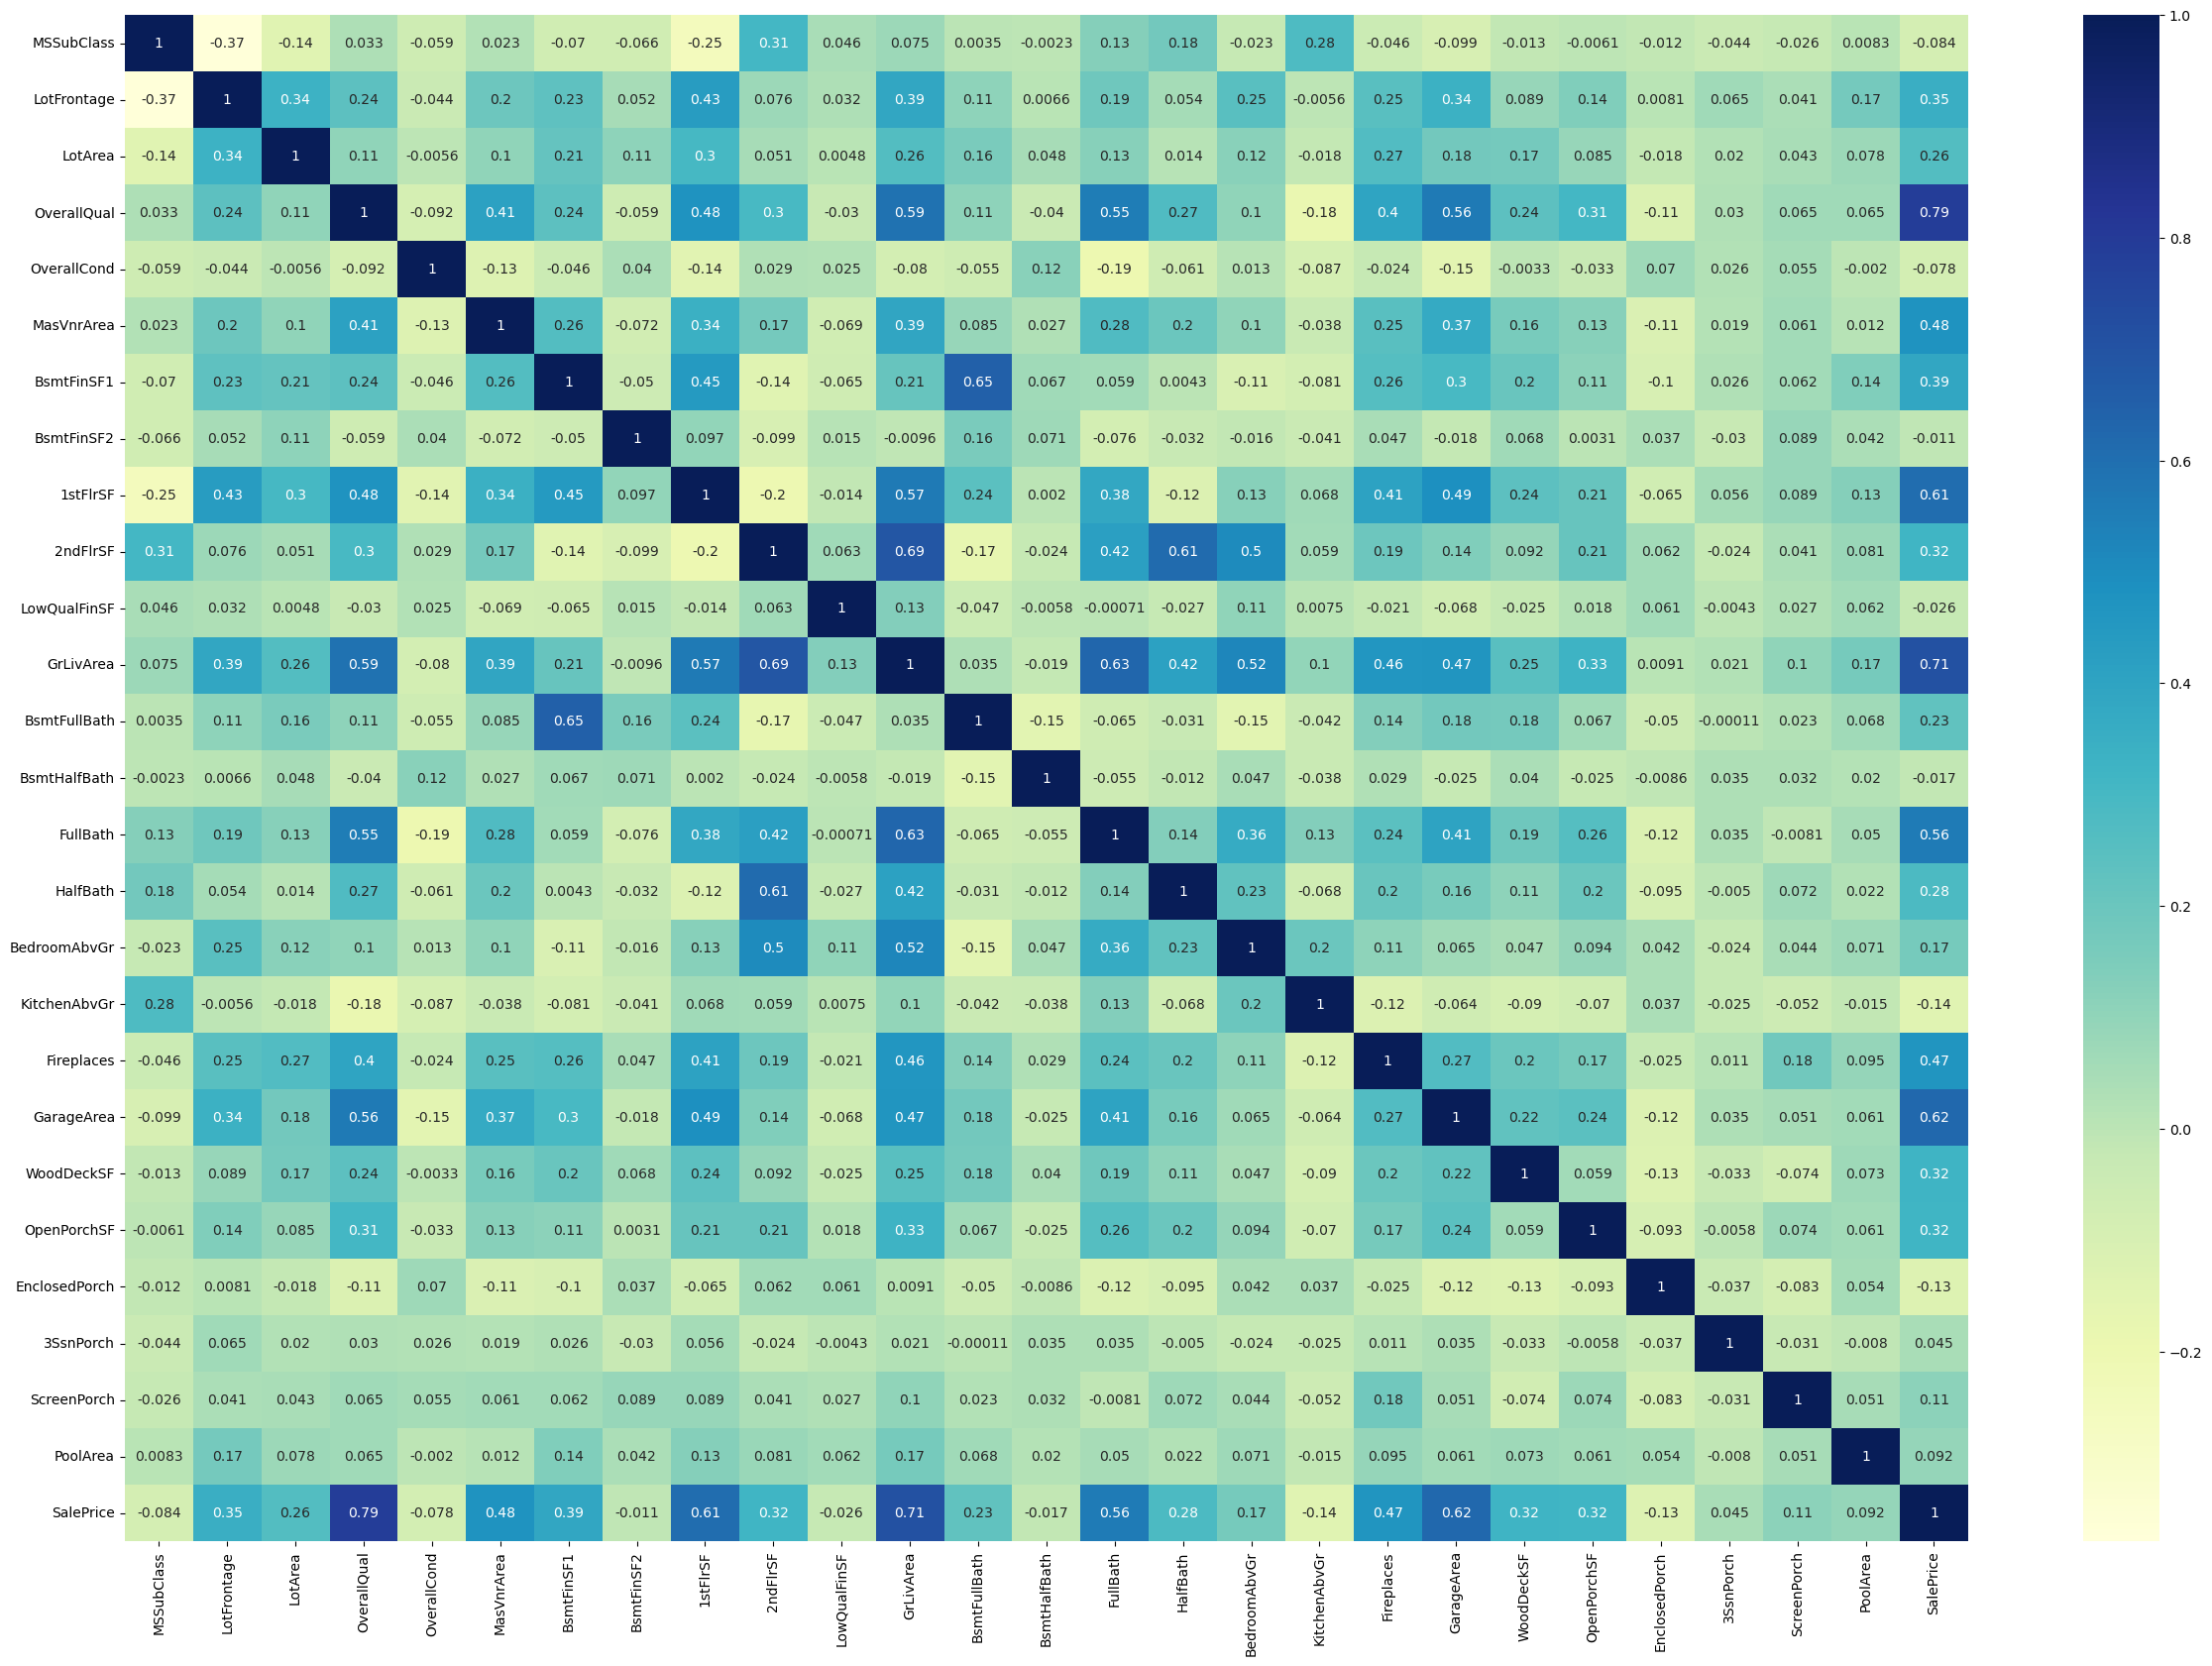

In [4160]:
# Heatmap

numeric_cols = house.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(30,20))
sns.heatmap(numeric_cols.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [4161]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 66 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  RoofStyle      1460 non-null   object 
 18  RoofMatl

In [4162]:
#Drop few of the categorical values which has less significance with Sales Price
house.drop(['Condition2'], axis=1, inplace=True)
house.drop(['Functional'], axis=1, inplace=True)
house.drop(['GarageCond'], axis=1, inplace=True)
house.drop(['Heating'], axis=1, inplace=True)
house.drop(['RoofMatl'], axis=1, inplace=True)

house.shape

(1460, 61)

In [4163]:
# Only numeric columns
num_vars = X_train.select_dtypes(include=['float64', 'int64'])
num_vars

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  MasVnrArea  \
210     0.058824     0.157534  0.019306     0.444444        0.625    0.000000   
318     0.235294     0.236301  0.039403     0.666667        0.500    0.160000   
239     0.176471     0.106164  0.033981     0.555556        0.375    0.000000   
986     0.176471     0.130137  0.017931     0.555556        0.875    0.000000   
1416    1.000000     0.133562  0.046139     0.333333        0.625    0.000000   
390     0.176471     0.099315  0.032409     0.444444        0.875    0.000000   
1005    0.352941     0.150685  0.032315     0.444444        0.875    0.137500   
568     0.176471     0.198630  0.050756     0.777778        0.875    0.000000   
342     0.411765     0.178082  0.033059     0.222222        0.375    0.212500   
114     0.294118     0.136986  0.027048     0.555556        0.875    0.000000   
499     0.000000     0.167808  0.028339     0.444444        0.750    0.000000   
365     0.294118     0.130137  0.043098     0.444444        0.750    0.000000   
308     0.058824     0.152397  0.050826     0.333333        0.500    0.000000   
797     0.000000     0.123288  0.029003     0.444444        0.500    0.000000   
703     1.000000     0.188356  0.028784     0.444444        1.000    0.000000   
858     0.000000     0.202055  0.041742     0.666667        0.500    0.118125   
25      0.000000     0.304795  0.059658     0.777778        0.500    0.400000   
88      0.176471     0.287671  0.032713     0.222222        0.125    0.000000   
1129    0.411765     0.133562  0.026772     0.444444        0.500    0.112500   
1425    0.000000     0.202055  0.043243     0.555556        0.625    0.151875   
728     0.411765     0.219178  0.046770     0.444444        0.500    0.059375   
883     0.323529     0.133562  0.022113     0.333333        0.500    0.000000   
606     0.000000     0.208904  0.051397     0.444444        0.500    0.000000   
1183    0.058824     0.133562  0.043613     0.444444        0.625    0.000000   
808     0.352941     0.219178  0.055775     0.444444        0.500    0.654375   
452     0.235294     0.219178  0.036610     0.555556        0.500    0.026250   
1395    0.235294     0.229452  0.052337     0.777778        0.500    0.153125   
1078    0.588235     0.054795  0.013837     0.555556        0.500    0.105625   
146     0.058824     0.102740  0.021720     0.444444        0.750    0.000000   
906     0.000000     0.325342  0.056248     0.777778        0.500    0.130000   
614     0.941176     0.000000  0.000065     0.333333        0.625    0.000000   
405     0.000000     0.171233  0.039828     0.333333        0.375    0.000000   
45      0.588235     0.136986  0.028915     0.888889        0.500    0.257500   
1443    0.058824     0.106164  0.034509     0.555556        0.625    0.000000   
1241    0.000000     0.212329  0.039164     0.666667        0.625    0.000000   
537     0.000000     0.178082  0.052665     0.333333        0.500    0.000000   
454     0.411765     0.143836  0.036582     0.444444        0.500    0.000000   
160     0.000000     0.160959  0.045110     0.555556        0.625    0.000000   
1433    0.235294     0.246575  0.041091     0.555556        0.500    0.198750   
1037    0.235294     0.167808  0.036315     0.777778        0.500    0.247500   
106     0.058824     0.133562  0.043613     0.333333        0.750    0.000000   
1307    0.000000     0.133562  0.030851     0.444444        0.500    0.000000   
876     0.000000     0.250000  0.111378     0.333333        0.500    0.000000   
771     0.000000     0.157534  0.034617     0.333333        0.500    0.000000   
890     0.176471     0.133562  0.030814     0.444444        0.750    0.000000   
420     0.411765     0.195205  0.026117     0.666667        0.500    0.125000   
1446    0.000000     0.178082  0.115382     0.444444        0.750    0.118125   
1315    0.235294     0.219178  0.044899     0.555556        0.500    0.000000   
384     0.235294     0.202055  0.2415

In [4164]:
# Split into X and y
X = house.drop(['SalePrice'], axis=1)
y = house['SalePrice']

In [4165]:
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [4166]:
# Getting rid of infinite and null values
X = X.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

In [4167]:
# Creating dummy variables for categorical variables

# Subset all categorical variables
house_categorical = X.select_dtypes(include=['object'])
house_categorical.head()

MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1 BldgType  ... CentralAir Electrical KitchenQual  \
0      CollgCr       Norm     1Fam  ...          Y      SBrkr          Gd   
1      Veenker      Feedr     1Fam  ...          Y      SBrkr          TA   
2      CollgCr       Norm     1Fam  ...          Y      SBrkr          Gd   
3      Crawfor       Norm     1Fam  ...          Y      SBrkr          Gd   
4      NoRidge       Norm     1Fam  ...          Y      SBrkr          Gd   

  FireplaceQu GarageType GarageFinish GarageQual PavedDrive SaleType  \
0           0     Attchd          RFn         TA          Y       WD   
1          TA     Attchd          RFn         TA          Y       WD   
2          TA     Attchd          RFn         TA          Y       WD   
3          Gd     Detchd          Unf         TA          Y       WD   
4          TA     Attchd          RFn         TA          Y       WD   

  SaleCondition  
0        Normal  
1        Normal  
2        Normal  
3       Abnorml  
4        Normal  

[5 rows x 34 columns]

In [4168]:
# Convert into dummies
house_dummies = pd.get_dummies(house_categorical, drop_first=True)
house_dummies.head()

MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  \
0            0            0            1            0            1   
1            0            0            1            0            1   
2            0            0            1            0            1   
3            0            0            1            0            1   
4            0            0            1            0            1   

   LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  \
0             0             0             1                0                0   
1             0             0             1                0                0   
2             0             0             0                0                0   
3             0             0             0                0                0   
4             0             0             0                0                0   

   ...  SaleType_ConLI  SaleType_ConLw  SaleType_New  SaleType_Oth  \
0  ...               0               0             0             0   
1  ...               0               0             0             0   
2  ...               0               0             0             0   
3  ...               0               0             0             0   
4  ...               0               0             0             0   

   SaleType_WD  SaleCondition_AdjLand  SaleCondition_Alloca  \
0            1                      0                     0   
1            1                      0                     0   
2            1                      0                     0   
3            1                      0                     0   
4            1                      0                     0   

   SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  
0                     0                     1                      0  
1                     0                     1                      0  
2                     0                     1                      0  
3                     0                     0                      0  
4                     0                     1                      0  

[5 rows x 182 columns]

In [4169]:
# Drop categorical variables 
X = X.drop(list(house_categorical.columns), axis=1)

In [4170]:
# Concat dummy variables with X
X = pd.concat([X, house_dummies], axis=1)

In [4171]:
# Split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [4172]:
X_train.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  \
210           30         67.0     5604            5            6         0.0   
318           60         90.0     9900            7            5       256.0   
239           50         52.0     8741            6            4         0.0   
986           50         59.0     5310            6            8         0.0   
1416         190         60.0    11340            4            6         0.0   

      BsmtFinSF1  BsmtFinSF2  1stFlrSF  2ndFlrSF  ...  SaleType_ConLI  \
210          468           0       864         0  ...               0   
318          987           0      1372      1274  ...               0   
239           94           0       798       689  ...               0   
986            0           0      1001       634  ...               0   
1416           0           0      1246      1044  ...               0   

      SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
210                0             0             0            1   
318                0             0             0            1   
239                0             0             0            1   
986                0             0             0            1   
1416               0             0             0            1   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
210                       0                     0                     0   
318                       0                     0                     0   
239                       0                     0                     0   
986                       0                     0                     0   
1416                      0                     0                     0   

      SaleCondition_Normal  SaleCondition_Partial  
210                      1                      0  
318                      1                      0  
239                      1                      0  
986                      1                      0  
1416                     1                      0  

[5 rows x 208 columns]

In [4173]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1021, 208)
(438, 208)
(1021,)
(438,)


In [4174]:
# Feature scaling - necessary before using Ridge or Lasso
from sklearn.preprocessing import MinMaxScaler

# Using Normalized scaler to scale
scaler = MinMaxScaler()

# Fit and Transform training set only
X_train[['MSSubClass',
         'LotFrontage', 
         'LotArea', 
         'OverallQual', 
         'OverallCond', 
         'MasVnrArea', 
         'BsmtFinSF1', 
         'BsmtFinSF2', 
         '1stFlrSF', 
         '2ndFlrSF', 
         'LowQualFinSF', 
         'GrLivArea', 
         'BsmtFullBath', 
         'BsmtHalfBath', 
         'FullBath', 
         'HalfBath', 
         'BedroomAbvGr', 
         'KitchenAbvGr', 
         'Fireplaces', 
         'GarageArea', 
         'WoodDeckSF', 
         'OpenPorchSF', 
         'EnclosedPorch', 
         '3SsnPorch', 
         'ScreenPorch', 
         'PoolArea']] = scaler.fit_transform(X_train[['MSSubClass',
                                                      'LotFrontage', 
                                                      'LotArea', 
                                                      'OverallQual', 
                                                      'OverallCond', 
                                                      'MasVnrArea', 
                                                      'BsmtFinSF1', 
                                                      'BsmtFinSF2', 
                                                      '1stFlrSF', 
                                                      '2ndFlrSF', 
                                                      'LowQualFinSF', 
                                                      'GrLivArea', 
                                                      'BsmtFullBath', 
                                                      'BsmtHalfBath', 
                                                      'FullBath', 
                                                      'HalfBath', 
                                                      'BedroomAbvGr', 
                                                      'KitchenAbvGr', 
                                                      'Fireplaces', 
                                                      'GarageArea', 
                                                      'WoodDeckSF', 
                                                      'OpenPorchSF', 
                                                      'EnclosedPorch', 
                                                      '3SsnPorch', 
                                                      'ScreenPorch', 
                                                      'PoolArea']])

In [4175]:
# Transform testing set
X_test[['MSSubClass',
        'LotFrontage', 
        'LotArea', 
        'OverallQual', 
        'OverallCond', 
        'MasVnrArea', 
        'BsmtFinSF1', 
        'BsmtFinSF2', 
        '1stFlrSF', 
        '2ndFlrSF', 
        'LowQualFinSF', 
        'GrLivArea', 
        'BsmtFullBath', 
        'BsmtHalfBath', 
        'FullBath', 
        'HalfBath', 
        'BedroomAbvGr', 
        'KitchenAbvGr', 
        'Fireplaces', 
        'GarageArea', 
        'WoodDeckSF', 
        'OpenPorchSF', 
        'EnclosedPorch', 
        '3SsnPorch', 
        'ScreenPorch', 
        'PoolArea']] = scaler.transform(X_test[['MSSubClass',
                                                'LotFrontage', 
                                                'LotArea', 
                                                'OverallQual', 
                                                'OverallCond', 
                                                'MasVnrArea', 
                                                'BsmtFinSF1', 
                                                'BsmtFinSF2', 
                                                '1stFlrSF', 
                                                '2ndFlrSF', 
                                                'LowQualFinSF', 
                                                'GrLivArea', 
                                                'BsmtFullBath', 
                                                'BsmtHalfBath', 
                                                'FullBath', 
                                                'HalfBath', 
                                                'BedroomAbvGr', 
                                                'KitchenAbvGr', 
                                                'Fireplaces', 
                                                'GarageArea', 
                                                'WoodDeckSF', 
                                                'OpenPorchSF', 
                                                'EnclosedPorch', 
                                                '3SsnPorch', 
                                                'ScreenPorch', 
                                                'PoolArea']])

## 3. Model Building and Evaluation

## Recursive Feature Elimination

Let's now try predicting house sales prices using Linear, Ridge & Lasso regression.

In [4176]:
# Use Recursive Feature Elimination (RFE) technique to reduce the features from 208 to 100
rfe = RFE(estimator = lm, n_features_to_select = 100)            
rfe = rfe.fit(X_train, y_train)

In [4177]:
# Top 100 features selected from RFE
col = X_train.columns[rfe.support_]
col

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea',
       'BsmtFinSF1', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'FullBath', 'KitchenAbvGr', 'GarageArea', '3SsnPorch',
       'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'Street_Pave', 'LotShape_IR3', 'LandContour_HLS', 'LandContour_Low',
       'LandContour_Lvl', 'Utilities_NoSeWa', 'Neighborhood_Crawfor',
       'Neighborhood_Edwards', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Veenker',
       'Condition1_PosN', 'BldgType_Twnhs', 'BldgType_TwnhsE',
       'HouseStyle_1Story', 'HouseStyle_2.5Fin', 'Exterior1st_AsphShn',
       'Exterior1st_BrkComm', 'Exterior1st_CBlock', 'Exterior1st_HdBoard',
       'Exterior1st_ImStucc', 'Exterior1st_MetalSd', 'Exterior1st_Plywood',
       'Exterior1st_Stone', 'Exterior1st_Stucco', 'Exterior2nd_AsphShn',
       'Exterior2nd_Brk Cmn', 'Exterior2n

In [4178]:
# Check the ranks
list(zip(X_test.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 13),
 ('LotFrontage', True, 1),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', True, 1),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', False, 104),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', True, 1),
 ('BsmtHalfBath', False, 39),
 ('FullBath', True, 1),
 ('HalfBath', False, 60),
 ('BedroomAbvGr', False, 75),
 ('KitchenAbvGr', True, 1),
 ('Fireplaces', False, 22),
 ('GarageArea', True, 1),
 ('WoodDeckSF', False, 11),
 ('OpenPorchSF', False, 40),
 ('EnclosedPorch', False, 95),
 ('3SsnPorch', True, 1),
 ('ScreenPorch', False, 54),
 ('PoolArea', False, 97),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', True, 1),
 ('MSZoning_RL', True, 1),
 ('MSZoning_RM', True, 1),
 ('Street_Pave', True, 1),
 ('LotShape_IR2', False, 94),
 ('LotShape_IR3', True, 1),
 ('LotShape_Reg', False, 83),
 ('LandContour_HLS', True, 1),
 ('LandContour_Low', True, 1),
 ('LandContou

In [4179]:
# Eliminated features
X_train.columns[~rfe.support_]

Index(['MSSubClass', 'BsmtFinSF2', 'BsmtHalfBath', 'HalfBath', 'BedroomAbvGr',
       'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
       'ScreenPorch',
       ...
       'SaleType_ConLD', 'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New',
       'SaleType_Oth', 'SaleType_WD', 'SaleCondition_AdjLand',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=108)

In [4180]:
# Features used in training the model
X_test_features = X_test[X_train_rfe.columns]

In [4181]:
# Create X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

X_train_rfe = pd.DataFrame(X_train[col])
X_train_rfe.shape

(1021, 100)

### Linear Regression using Features selected from RFE

In [4182]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train_rfe, y_train)

LinearRegression()

In [4183]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

-4.829744875583541e+16
[-6.09982639e+04  9.14956014e+04  8.18998541e+04  2.98853472e+04
  2.66259533e+04 -4.21914072e+04  1.58594890e+17  7.58098261e+16
  1.89065668e+16 -1.91048104e+17  2.41003438e+04  2.25780000e+04
 -4.91590000e+04  3.86816250e+04  2.92740000e+04  1.99720000e+04
  3.15195000e+04  2.85640000e+04  2.03260000e+04  1.85383750e+04
 -1.58040000e+04  2.65980000e+04  3.50560000e+04  2.27640000e+04
 -2.08001250e+04  3.03690000e+04 -1.57500000e+04  5.88620000e+04
  3.43740000e+04  2.95060000e+04  3.11285000e+04  2.08120000e+04
 -2.36080000e+04 -3.04080000e+04 -2.36120000e+04  1.51240000e+04
 -2.30610000e+04  3.57556483e+14 -3.29522500e+04 -2.39295289e+15
 -1.46880000e+04 -5.20533750e+04 -1.74880000e+04 -1.47460000e+04
 -2.56857500e+04 -2.01465000e+04 -3.57556483e+14  1.94667500e+04
  1.42350000e+04  2.39295289e+15  1.05260000e+04  3.67360000e+04
  1.44320000e+04  8.20600040e+12  7.29100000e+03  1.40985000e+04
 -3.20630000e+04 -2.99420000e+04 -6.24625359e+12 -2.67240000e+04
  

In [4184]:
# Predict
y_train_pred = lm.predict(X_train_rfe)
metrics.r2_score(y_true = y_train, y_pred = y_train_pred)

0.878618857696672

In [4185]:
# Calculation of some metrics such as R2 score, RSS and RMSE
y_pred_train = lm.predict(X_train_rfe)
y_pred_test = lm.predict(X_test[X_train_rfe.columns])

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("Training set R2 score - ", r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("Testing set R2 score - ", r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr**0.5)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr**0.5)
metric.append(mse_test_lr**0.5)

Training set R2 score -  0.878618857696672
Testing set R2 score -  -1.493302343420395e+21
774496508974.0
4.209190027000564e+33
27542.087977505027
3100003692368019.0


## Ridge and Lasso Regression

Let's now try predicting house sales prices using ridge and lasso regression.

### Ridge Regression

In [4186]:
# List of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# Cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)  

model_cv.fit(X_train_rfe, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [4187]:
# Best hyperparameter alpha
best_ridge_alpha = model_cv.best_params_
print(best_ridge_alpha)

{'alpha': 3.0}


In [4188]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=5]
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.003626      0.000936         0.001439        0.000335      0.0001   
1       0.002717      0.000164         0.001233        0.000089       0.001   
2       0.002930      0.000362         0.001393        0.000285        0.01   
3       0.002520      0.000190         0.001348        0.000563        0.05   
4       0.002967      0.000448         0.001233        0.000104         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}      -20249.683742      -20987.166934      -22655.836265   
1   {'alpha': 0.001}      -20248.787485      -20987.046203      -22655.565646   
2    {'alpha': 0.01}      -20239.832574      -20985.808569      -22652.833470   
3    {'alpha': 0.05}      -20200.247440      -20981.227078      -22640.538252   
4     {'alpha': 0.1}      -20153.040825      -20976.927767      -22630.973463   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0      -18050.788412  ...    -20391.938371     1491.436700               21   
1      -18048.440428  ...    -20390.970860     1492.159740               20   
2      -18025.374673  ...    -20381.392632     1499.247598               19   
3      -17931.158360  ...    -20342.476336     1527.787105               18   
4      -17841.121823  ...    -20305.701116     1555.553320               16   

   split0_train_score  split1_train_score  split2_train_score  \
0       -17732.207623       -15186.780887       -16766.920710   
1       -17731.798128       -15186.975887       -16766.647441   
2       -17727.727104       -15188.868823       -16763.932697   
3       -17711.534322       -15196.748729       -16754.742119   
4       -17694.082429       -15210.956235       -16746.410488   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0       -17984.755678       -17882.286246     -17110.590229      1055.010832  
1       -17984.783383       -17882.299310     -17110.500830      1054.915785  
2       -17985.055876       -17882.374294     -17109.591759      1053.980869  
3       -17986.115960       -17882.230582     -17106.274343      1049.993521  
4       -17987.876714       -17880.672662     -17103.999706      1043.469281  

[5 rows x 21 columns]

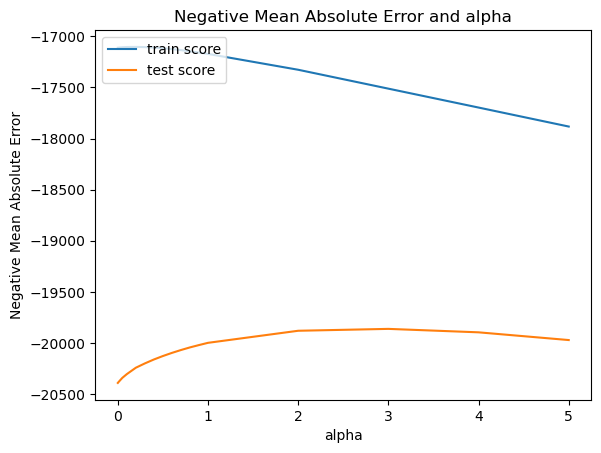

In [4189]:
# Plot mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [4190]:
# Fitting Ridge model for best alpha and printing coefficients which have been penalised
ridge = Ridge(alpha = int(best_ridge_alpha.get('alpha')))

ridge.fit(X_train_rfe, y_train)
print(ridge.coef_)

[-13784.17805011  34421.89717286  83235.87409234  28765.44401244
  27522.45468791  -3773.95722164  73047.91696901  61465.46421959
  -2050.01726233  84826.56149683  20470.57282487  32683.98265927
 -34003.85617509  39101.44715427  15686.57881281   3409.72146122
  11771.10548927  12310.21596316   2253.21602799   5139.29411343
 -12543.0536664   20190.27596796  28335.29573217  16294.46561215
  -4311.8710128   27594.08829364 -15518.57792235  57430.67624017
  32172.72674187  25787.87732773  26063.93804873  17616.10741533
 -14858.01565831 -24216.35445746 -19414.85915142  13212.60819279
  -6116.71736153  -1092.97013455  -6061.80989862  -4393.94862381
  -9455.80972778  -9153.40414025  -7996.18508604  -7077.3891319
  -2323.26207791 -14591.54637503  -1092.97013455   1603.71526901
  17281.72542721  -4393.94862381   4063.38420604  18025.95420853
   3124.51189181      0.           1429.41128049  -5392.09167325
  -8356.66321705  -6035.11406728      0.          -3473.1549352
   8805.80893913  38324.495

In [4191]:
# Calculation of some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train_rfe)
y_pred_test = ridge.predict(X_test[X_train_rfe.columns])

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("Training set R2 score - ",r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("Testing set R2 score - ",r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

Training set R2 score -  0.8718507878152617
Testing set R2 score -  0.8382464361790748
817681524341.0912
455936797170.862
800863393.0862793
1040951591.7142968


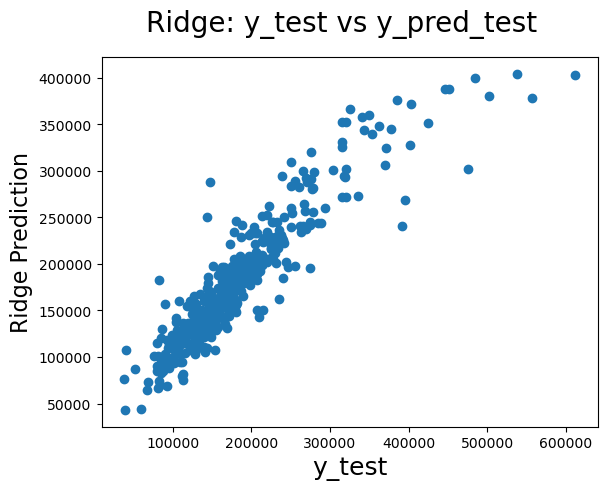

In [4192]:
# Plot y_test and y_pred to understand the spread for ridge regression

fig = plt.figure(dpi=100)
plt.scatter(y_test,y_pred_test)
fig.suptitle('Ridge: y_test vs y_pred_test', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('Ridge Prediction', fontsize=16)  
plt.show()

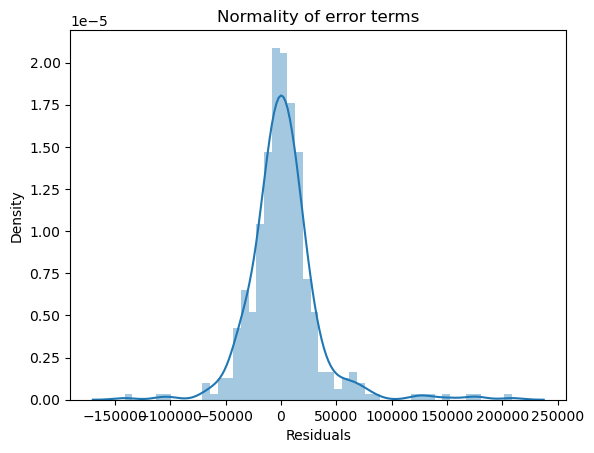

In [4193]:
# Distribution of errors

y_res=y_test-y_pred_test

sns.distplot(y_res,kde=True)
plt.title('Normality of error terms')
plt.xlabel("Residuals")
plt.show()

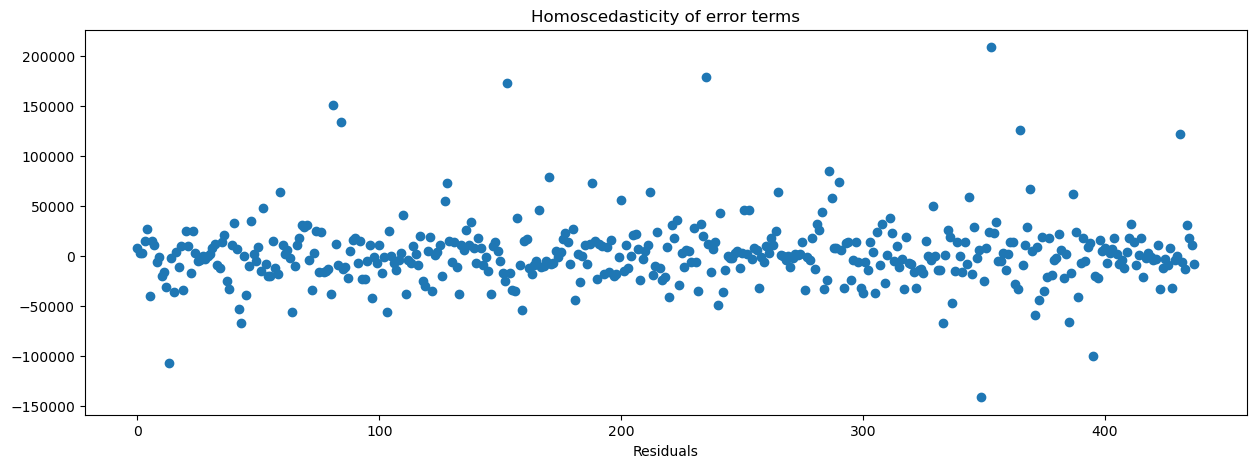

In [4194]:
# Plot error terms for test data

plt.figure(figsize=(15, 5))
c = [i for i in range(0, 438, 1)]
plt.title('Homoscedasticity of error terms')
plt.xlabel("Residuals")
plt.plot(c, y_res, marker = 'o', linestyle = "")
plt.show()

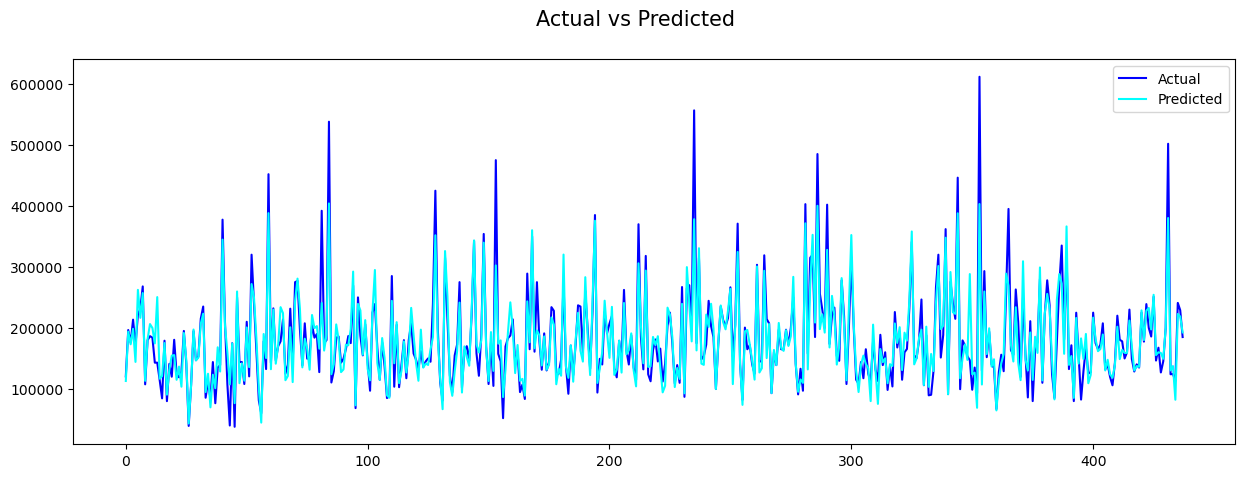

In [4195]:
# Actual vs Predicted

plt.figure(figsize=(15, 5))
c = [i for i in range(0, len(X_test_features), 1)]
plt.plot(c, y_test, color = "blue")
plt.plot(c, y_pred_test, color = "cyan")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.legend(['Actual','Predicted'])
plt.show()

### Lasso Regression

In [4196]:
lasso = Lasso()

#Cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_rfe, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [4197]:
# Best hyperparameter alpha
best_lasso_alpha = model_cv.best_params_
print(best_lasso_alpha)

{'alpha': 100}


In [4198]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=100]
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.227353      0.010612         0.002091        0.001158      0.0001   
1       0.221294      0.033263         0.001951        0.000407       0.001   
2       0.211533      0.026449         0.001598        0.000228        0.01   
3       0.227313      0.045395         0.001512        0.000070        0.05   
4       0.229819      0.033408         0.001805        0.000431         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}      -20249.781994      -20987.187627      -22655.865925   
1   {'alpha': 0.001}      -20249.769918      -20987.179084      -22655.862514   
2    {'alpha': 0.01}      -20249.653816      -20987.095656      -22655.822519   
3    {'alpha': 0.05}      -20249.167403      -20986.751031      -22655.647378   
4     {'alpha': 0.1}      -20248.551470      -20986.321295      -22655.365624   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0      -18069.483890  ...    -20390.391908     1486.978469               26   
1      -18069.421217  ...    -20390.362215     1486.999866               25   
2      -18068.783994  ...    -20390.070728     1487.213405               24   
3      -18065.956551  ...    -20388.934723     1488.123856               23   
4      -18062.421924  ...    -20387.499233     1489.243741               22   

   split0_train_score  split1_train_score  split2_train_score  \
0       -17732.252008       -15186.760573       -16766.950379   
1       -17732.241793       -15186.765846       -16766.944108   
2       -17732.137936       -15186.818580       -16766.879680   
3       -17731.700136       -15187.052949       -16766.594099   
4       -17731.147129       -15187.345508       -16766.231039   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0       -17984.755747       -17882.284760     -17110.600693      1055.021332  
1       -17984.760868       -17882.285024     -17110.599528      1055.019501  
2       -17984.809951       -17882.289710     -17110.587171      1055.001049  
3       -17985.029044       -17882.296440     -17110.534534      1054.919923  
4       -17985.302911       -17882.308149     -17110.466947      1054.818953  

[5 rows x 21 columns]

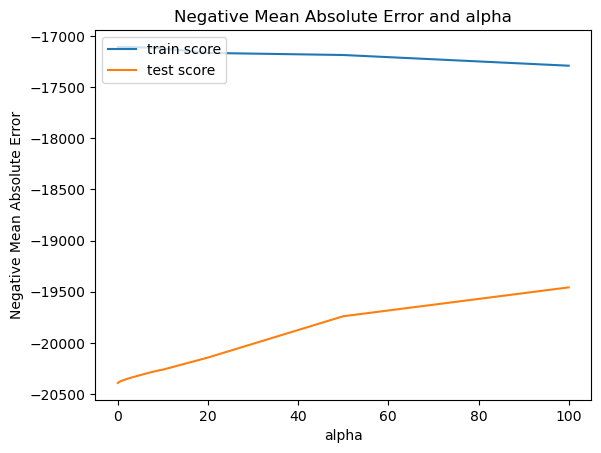

In [4199]:
# Plot mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [4200]:
# Fitting Lasso model for best alpha and printing coefficients which have been penalised
lasso = Lasso(alpha = int(best_lasso_alpha.get('alpha')))
        
lasso.fit(X_train_rfe, y_train) 

Lasso(alpha=100)

In [4201]:
lasso.coef_

array([-4.02356999e+03,  1.97545289e+04,  1.05058264e+05,  2.88473531e+04,
        1.53517364e+04, -0.00000000e+00,  0.00000000e+00,  1.59540600e+04,
       -8.94123679e+03,  2.19016065e+05,  1.91749016e+04,  2.36477272e+04,
       -3.60553615e+04,  3.16531824e+04,  0.00000000e+00,  0.00000000e+00,
        1.72865320e+02,  8.10517852e+03, -1.63369637e+03,  0.00000000e+00,
       -7.75753835e+03,  1.96916278e+04,  2.67402058e+04,  1.59645805e+04,
       -0.00000000e+00,  2.36782460e+04, -1.46655011e+04,  5.67484566e+04,
        3.16792130e+04,  2.49444006e+04,  2.08194329e+04,  1.24598948e+04,
       -1.07398306e+04, -2.01442350e+04, -1.57525883e+04,  1.33320159e+04,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -3.56689835e+03, -0.00000000e+00, -3.92345099e+03, -2.76330216e+03,
       -0.00000000e+00, -1.53892372e+04, -0.00000000e+00, -0.00000000e+00,
        1.40307564e+04, -0.00000000e+00, -0.00000000e+00,  5.66430721e+03,
       -0.00000000e+00,  

In [4202]:
# Calculation of some metrics such as R2 score, RSS and RMSE
y_pred_train = lasso.predict(X_train_rfe)
y_pred_test = lasso.predict(X_test[X_train_rfe.columns])

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("Training set R2 score - ", r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("Testing set R2 score - ",r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

Training set R2 score -  0.8689176078722685
Testing set R2 score -  0.8439859315028525
836397262081.9988
439758809783.84265
819194184.2135149
1004015547.4516956


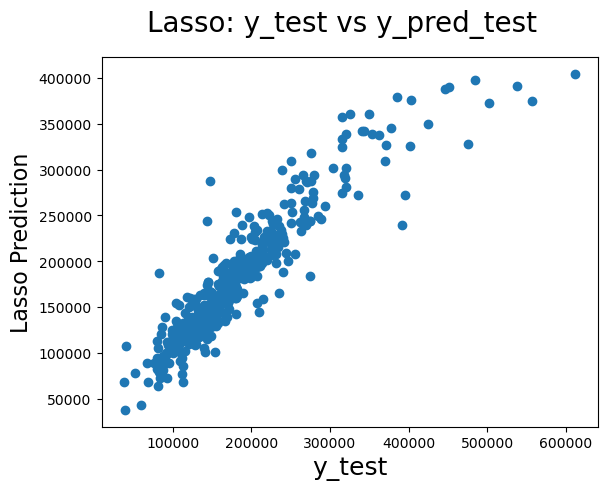

In [4203]:
# Plot y_test and y_pred to understand the spread for lasso regression

fig = plt.figure(dpi=100)
plt.scatter(y_test,y_pred_test)
fig.suptitle('Lasso: y_test vs y_pred_test', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('Lasso Prediction', fontsize=16)  
plt.show()

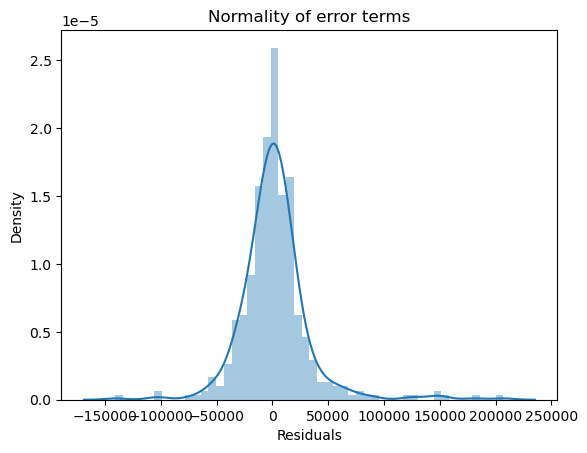

In [4204]:
# Distribution of errors
y_res=y_test-y_pred_test

sns.distplot(y_res,kde=True)
plt.title('Normality of error terms')
plt.xlabel("Residuals")
plt.show()

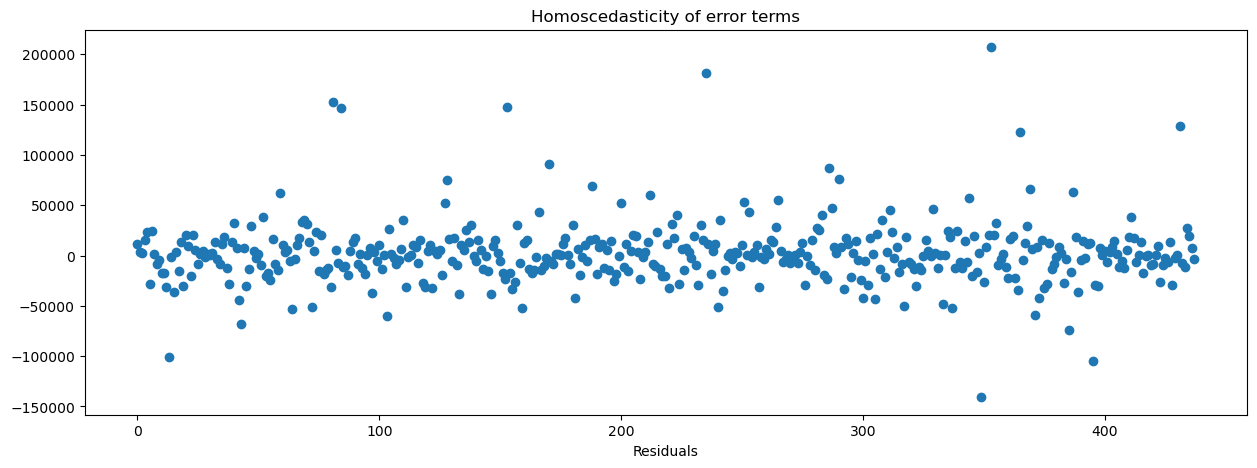

In [4205]:
# Plot error terms for test data

plt.figure(figsize=(15, 5))
c = [i for i in range(0, 438, 1)]
plt.title('Homoscedasticity of error terms')
plt.xlabel("Residuals")
plt.plot(c, y_res, marker = 'o', linestyle = "")
plt.show()

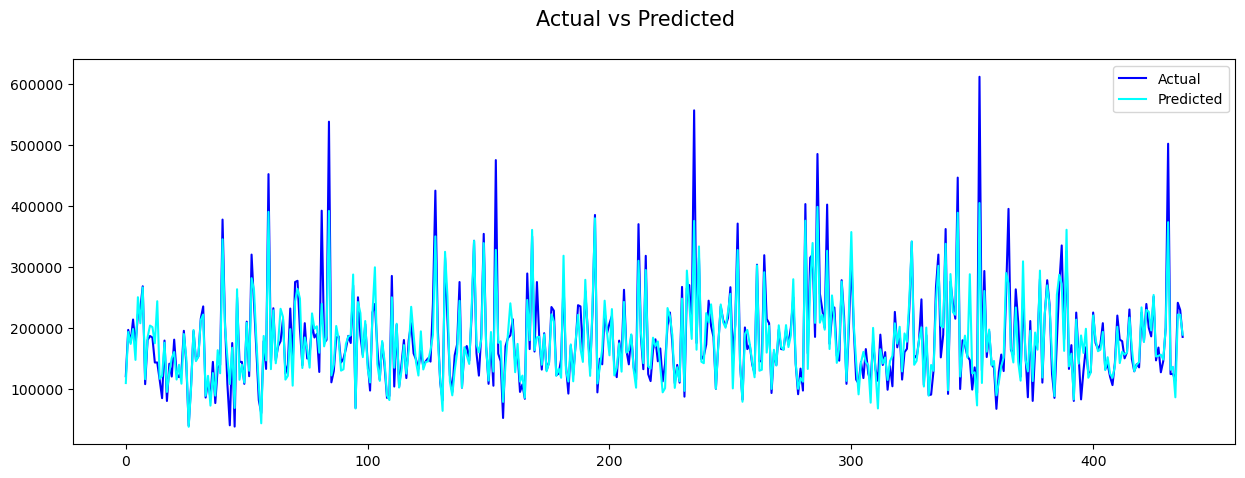

In [4206]:
# Actual vs Predicted

plt.figure(figsize=(15, 5))
c = [i for i in range(0, len(X_test_features), 1)]
plt.plot(c, y_test, color = "blue")
plt.plot(c, y_pred_test, color = "cyan")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.legend(['Actual','Predicted'])
plt.show()

## 4. Conclusion

In [4207]:
# Creating a table which contain all the metrics
lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table, columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

Metric  Linear Regression  Ridge Regression  Lasso Regression
0  R2 Score (Train)       8.786189e-01      8.718508e-01      8.689176e-01
1   R2 Score (Test)      -1.493302e+21      8.382464e-01      8.439859e-01
2       RSS (Train)       7.744965e+11      8.176815e+11      8.363973e+11
3        RSS (Test)       4.209190e+33      4.559368e+11      4.397588e+11
4       MSE (Train)       2.754209e+04      2.829953e+04      2.862157e+04
5        MSE (Test)       3.100004e+15      3.226378e+04      3.168620e+04

In [4208]:
# Lets observe the changes in the coefficients after regularization
betas = pd.DataFrame(index=X_train_rfe.columns)

In [4209]:
betas.rows = X.columns

In [4210]:
betas['Linear'] = sorted(lm.coef_, reverse=True)
betas['Ridge'] = sorted(ridge.coef_, reverse=True)
betas['Lasso'] = sorted(lasso.coef_, reverse=True)

In [4211]:
pd.set_option('display.max_rows', None)
betas

Linear         Ridge          Lasso
LotFrontage           1.585949e+17  84826.561497  219016.065392
LotArea               7.580983e+16  83235.874092  105058.264454
OverallQual           4.587447e+16  73047.916969   56748.456639
OverallCond           4.587447e+16  61465.464220   41522.734586
MasVnrArea            4.587447e+16  57430.676240   31679.213006
BsmtFinSF1            4.587447e+16  39101.447154   31653.182356
1stFlrSF              3.845111e+16  38324.495812   28847.353090
2ndFlrSF              3.845111e+16  34421.897173   26740.205798
LowQualFinSF          3.845111e+16  32683.982659   24944.400601
GrLivArea             2.435137e+16  32172.726742   23678.246042
BsmtFullBath          2.435137e+16  28765.444012   23647.727223
FullBath              2.435137e+16  28335.295732   23606.804720
KitchenAbvGr          2.435137e+16  27594.088294   20819.432912
GarageArea            1.890657e+16  27522.454688   19754.528942
3SsnPorch             1.758071e+16  26063.938049   19691.627756
MSZoning_FV           1.758071e+16  25787.877328   19174.901638
MSZoning_RH           1.758071e+16  24509.649559   15964.580483
MSZoning_RL           1.758071e+16  20470.572825   15954.060017
MSZoning_RM           2.392953e+15  20190.275968   15351.736410
Street_Pave           3.575565e+14  18745.255424   14030.756364
LotShape_IR3          8.206000e+12  18025.954209   13795.683558
LandContour_HLS       9.149560e+04  17616.107415   13332.015907
LandContour_Low       8.189985e+04  17281.725427   12459.894809
LandContour_Lvl       5.886200e+04  16294.465612    8105.178518
Utilities_NoSeWa      3.868162e+04  15686.578813    7815.147430
Neighborhood_Crawfor  3.673600e+04  13212.608193    7604.670398
Neighborhood_Edwards  3.505600e+04  12310.215963    5664.307206
Neighborhood_NoRidge  3.437400e+04  12182.373114    5266.963621
Neighborhood_NridgHt  3.151950e+04  11771.105489    5196.815439
Neighborhood_Somerst  3.112850e+04  11719.608556    4807.174923
Neighborhood_StoneBr  3.036900e+04  10653.558222    3841.868167
Neighborhood_Veenker  2.988535e+04   9848.602918    2556.697634
Condition1_PosN       2.950600e+04   9531.195569    2094.635583
BldgType_Twnhs        2.927400e+04   9326.073383    1384.829867
BldgType_TwnhsE       2.893275e+04   8805.808939     709.785848
HouseStyle_1Story     2.856400e+04   7458.266896     172.865320
HouseStyle_2.5Fin     2.662595e+04   7262.158274      -0.000000
Exterior1st_AsphShn   2.659800e+04   6208.046827       0.000000
Exterior1st_BrkComm   2.410034e+04   5139.294113       0.000000
Exterior1st_CBlock    2.276400e+04   4897.414252       0.000000
Exterior1st_HdBoard   2.264000e+04   4866.751870       0.000000
Exterior1st_ImStucc   2.257800e+04   4063.384206      -0.000000
Exterior1st_MetalSd   2.171206e+04   3409.721461      -0.000000
Exterior1st_Plywood   2.081200e+04   3124.511892      -0.000000
Exterior1st_Stone     2.060700e+04   2877.284616      -0.000000
Exterior1st_Stucco    2.032600e+04   2811.931985      -0.000000
Exterior2nd_AsphShn   1.997200e+04   2492.883759      -0.000000
Exterior2nd_Brk Cmn   1.946675e+04   2394.234639      -0.000000
Exterior2nd_BrkFace   1.853838e+04   2253.216028      -0.000000
Exterior2nd_CBlock    1.660200e+04   1603.715269      -0.000000
Exterior2nd_HdBoard   1.512400e+04   1429.411280      -0.000000
Exterior2nd_ImStucc   1.443200e+04   1139.365565      -0.000000
Exterior2nd_MetalSd   1.423500e+04    847.027859      -0.000000
Exterior2nd_Other     1.409850e+04    775.672585       0.000000
Exterior2nd_Plywood   1.052600e+04    435.587074      -0.000000
ExterQual_Fa          7.291000e+03    416.268597      -0.000000
ExterCond_Fa         -1.468800e+04    309.937716      -0.000000
ExterCond_Gd         -1.474600e+04    170.138064       0.000000
ExterCond_Po         -1.575000e+04      0.000000       0.000000
ExterCond_TA         -1.580400e+04      0.000000      -0.000000
Foundation_Stone     -1.748800e+04   -330.061837      -0.000000
BsmtQual_Ex          -2.014650e+04   -885.012338      -0.000

## Assignment
#### Q1: 
1) What is the optimal value of alpha for ridge and lasso regression? - Ridge: 3 | Lasso: 100 <br>
2) What will be the changes in the model if you choose double the value of alpha for both ridge and lasso?

In [4212]:
# Ridge
ridge2 = Ridge(alpha = 6)
ridge2.fit(X_train_rfe, y_train) 

Ridge(alpha=6)

In [4213]:
# Calculation of some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge2.predict(X_train_rfe)
y_pred_test = ridge2.predict(X_test[X_train_rfe.columns])

metricR2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("Training set R2 score - ", r2_train_lr)
metricR2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("Testing set R2 score - ",r2_test_lr)
metricR2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metricR2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metricR2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metricR2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metricR2.append(mse_test_lr**0.5)

Training set R2 score -  0.8649435321597129
Testing set R2 score -  0.8301857458631146
861754642210.133
478657565967.73254
844030011.9589942
1092825493.077015


In [4214]:
# Lasso
lasso2 = Lasso(alpha = 200)
lasso2.fit(X_train_rfe, y_train) 

Lasso(alpha=200)

In [4215]:
# Calculation of some metrics such as R2 score, RSS and RMSE
y_pred_train = lasso2.predict(X_train_rfe)
y_pred_test = lasso2.predict(X_test[X_train_rfe.columns])

metricL2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("Training set R2 score - ", r2_train_lr)
metricL2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("Testing set R2 score - ",r2_test_lr)
metricL2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metricL2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metricL2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metricL2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metricL2.append(mse_test_lr**0.5)

Training set R2 score -  0.8595904721349068
Testing set R2 score -  0.8349390025870937
895910905883.9419
465259501679.88074
877483747.1928911
1062236305.2052071


In [4216]:
# Creating a table which contain all the metrics
lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Ridge Regression': metricR2
        }

rg_metric = pd.DataFrame(lr_table, columns = ['Metric', 'Ridge Regression'] )

ls_metric = pd.Series(metricL2, name = 'Lasso Regression')

final_metric = pd.concat([rg_metric, ls_metric], axis = 1)

final_metric

Metric  Ridge Regression  Lasso Regression
0  R2 Score (Train)      8.649435e-01      8.595905e-01
1   R2 Score (Test)      8.301857e-01      8.349390e-01
2       RSS (Train)      8.617546e+11      8.959109e+11
3        RSS (Test)      4.786576e+11      4.652595e+11
4       MSE (Train)      2.905219e+04      2.962235e+04
5        MSE (Test)      3.305791e+04      3.259197e+04

#### Q1: 
3) What will be the most important predictor variables after the change is implemented

In [4217]:
# Lets observe the changes in the coefficients after regularization
betas1 = pd.DataFrame(index=X_train_rfe.columns)

betas1.rows = X.columns

betas1['Ridge'] = sorted(ridge2.coef_, reverse=True)
betas1['Lasso'] = sorted(lasso2.coef_, reverse=True)

pd.set_option('display.max_rows', None)
betas1

Ridge          Lasso
LotFrontage           77139.367749  200621.709404
LotArea               71049.539436  117186.206084
OverallQual           59117.206494   56069.692444
OverallCond           55749.502880   43396.092817
MasVnrArea            55576.018367   36109.279872
BsmtFinSF1            39277.557749   29146.521335
1stFlrSF              38978.896087   24542.697950
2ndFlrSF              34369.663798   22336.603797
LowQualFinSF          30983.968904   21216.951566
GrLivArea             27505.476728   20266.774666
BsmtFullBath          26269.700344   19637.956639
FullBath              25377.192678   16598.731644
KitchenAbvGr          25133.636660   16224.629974
GarageArea            23749.701948   13589.834668
3SsnPorch             22957.985518   11331.232710
MSZoning_FV           22610.242044   10815.319360
MSZoning_RH           22385.669158   10055.649058
MSZoning_RL           19411.945259    9911.162502
MSZoning_RM           18408.055459    9360.975981
Street_Pave           16134.866488    8983.312309
LotShape_IR3          15958.567823    8896.255892
LandContour_HLS       15368.036003    8448.287623
LandContour_Low       13327.909994    8212.244387
LandContour_Lvl       12362.147267    6703.294967
Utilities_NoSeWa      11331.517280    4374.674374
Neighborhood_Crawfor  11184.244480    4256.034665
Neighborhood_Edwards  10989.587222    4100.770241
Neighborhood_NoRidge  10612.508261    3609.334135
Neighborhood_NridgHt  10053.885260    3056.480458
Neighborhood_Somerst   9501.981465    2160.222390
Neighborhood_StoneBr   9407.483424    1729.234745
Neighborhood_Veenker   8070.522534      86.981142
Condition1_PosN        7508.489462      -0.000000
BldgType_Twnhs         7295.331005       0.000000
BldgType_TwnhsE        7010.574814       0.000000
HouseStyle_1Story      6960.782886       0.000000
HouseStyle_2.5Fin      6366.196817      -0.000000
Exterior1st_AsphShn    6071.826625       0.000000
Exterior1st_BrkComm    5884.557266       0.000000
Exterior1st_CBlock     4240.626732       0.000000
Exterior1st_HdBoard    3977.348162       0.000000
Exterior1st_ImStucc    3966.192616      -0.000000
Exterior1st_MetalSd    3711.262913      -0.000000
Exterior1st_Plywood    3639.530053      -0.000000
Exterior1st_Stone      3012.978387      -0.000000
Exterior1st_Stucco     2592.180791      -0.000000
Exterior2nd_AsphShn    2522.900194      -0.000000
Exterior2nd_Brk Cmn    2491.053456      -0.000000
Exterior2nd_BrkFace    1365.850302      -0.000000
Exterior2nd_CBlock      705.987809      -0.000000
Exterior2nd_HdBoard     529.135796      -0.000000
Exterior2nd_ImStucc     489.139715      -0.000000
Exterior2nd_MetalSd     357.363273      -0.000000
Exterior2nd_Other         0.000000      -0.000000
Exterior2nd_Plywood       0.000000       0.000000
ExterQual_Fa            -24.934196      -0.000000
ExterCond_Fa            -65.235864       0.000000
ExterCond_Gd            -67.077339      -0.000000
ExterCond_Po           -129.678346      -0.000000
ExterCond_TA           -209.173984      -0.000000
Foundation_Stone       -427.949747      -0.000000
BsmtQual_Ex            -489.854126       0.000000
BsmtQual_Fa            -827.865817       0.000000
BsmtQual_Gd            -827.865817       0.000000
BsmtQual_TA           -1112.435591      -0.000000
BsmtCond_Fa           -1130.658597      -0.000000
BsmtCond_Gd           -1344.759756       0.000000
BsmtCond_Po           -1489.810246      -0.000000
BsmtCond_TA           -1770.197451      -0.000000
BsmtExposure_Gd       -2170.877575      -0.000000
BsmtFinType1_ALQ      -2656.986006      -0.000000
BsmtFinType1_BLQ      -2783.288472      -0.000000
BsmtFinType1_GLQ      -2853.433381      -0.000000
BsmtFinType1_LwQ      -2853.433381      -0.000000
BsmtFinType1_Rec      -2966.347610      -0.000000
BsmtFinType1_Unf      -3343.432132      -0.000000
Electrical_FuseA      -3644.871672       0.000000
Electrical_FuseF      -4355.558745       0.000000
Electrical_FuseP      -4624.521430       0.000000
Electrical_SBrkr      -4813.5

#### Q3: 

In [4218]:
X_train_rfe.head()

LotFrontage   LotArea  OverallQual  OverallCond  MasVnrArea  BsmtFinSF1  \
210      0.157534  0.019306     0.444444        0.625        0.00    0.082920   
318      0.236301  0.039403     0.666667        0.500        0.16    0.174876   
239      0.106164  0.033981     0.555556        0.375        0.00    0.016655   
986      0.130137  0.017931     0.555556        0.875        0.00    0.000000   
1416     0.133562  0.046139     0.333333        0.625        0.00    0.000000   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  ...  GarageFinish_Fin  \
210   0.113889  0.000000           0.0   0.081860  ...                 0   
318   0.231481  0.616949           0.0   0.424289  ...                 0   
239   0.098611  0.333656           0.0   0.201576  ...                 0   
986   0.145602  0.307022           0.0   0.230015  ...                 0   
1416  0.202315  0.505569           0.0   0.355880  ...                 0   

      GarageFinish_RFn  GarageFinish_Unf  GarageQual_Ex  GarageQual_Fa  \
210                  0                 0              0              0   
318                  1                 0              0              0   
239                  0                 1              0              0   
986                  0                 1              0              1   
1416                 0                 1              0              0   

      GarageQual_Gd  GarageQual_Po  GarageQual_TA  SaleType_Con  \
210               0              0              0             0   
318               0              0              1             0   
239               0              0              1             0   
986               0              0              0             0   
1416              0              0              1             0   

      SaleCondition_Alloca  
210                      0  
318                      0  
239                      0  
986                      0  
1416                     0  

[5 rows x 100 columns]

In [4219]:
X_train_rfe1 = X_train_rfe.drop(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea'], axis=1)
X_test2 = X_test.drop(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea'], axis=1)

In [4220]:
X_train_rfe1.head()

BsmtFinSF1  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
210     0.082920  0.113889  0.000000           0.0   0.081860      0.333333   
318     0.174876  0.231481  0.616949           0.0   0.424289      0.333333   
239     0.016655  0.098611  0.333656           0.0   0.201576      0.000000   
986     0.000000  0.145602  0.307022           0.0   0.230015      0.000000   
1416    0.000000  0.202315  0.505569           0.0   0.355880      0.000000   

      FullBath  KitchenAbvGr  GarageArea  3SsnPorch  ...  GarageFinish_Fin  \
210   0.333333           0.0    0.000000        0.0  ...                 0   
318   0.666667           0.0    0.462623        0.0  ...                 0   
239   0.333333           0.0    0.155148        0.0  ...                 0   
986   0.333333           0.0    0.179831        0.0  ...                 0   
1416  0.666667           0.5    0.394922        0.0  ...                 0   

      GarageFinish_RFn  GarageFinish_Unf  GarageQual_Ex  GarageQual_Fa  \
210                  0                 0              0              0   
318                  1                 0              0              0   
239                  0                 1              0              0   
986                  0                 1              0              1   
1416                 0                 1              0              0   

      GarageQual_Gd  GarageQual_Po  GarageQual_TA  SaleType_Con  \
210               0              0              0             0   
318               0              0              1             0   
239               0              0              1             0   
986               0              0              0             0   
1416              0              0              1             0   

      SaleCondition_Alloca  
210                      0  
318                      0  
239                      0  
986                      0  
1416                     0  

[5 rows x 95 columns]

In [4221]:
X_test2[X_train_rfe1.columns].head()

BsmtFinSF1  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
1436    0.109142  0.113889  0.000000           0.0   0.081860      0.000000   
57      0.000000  0.112963  0.416465           0.0   0.246349      0.000000   
780     0.000000  0.203935  0.000000           0.0   0.156610      0.000000   
382     0.000000  0.131250  0.415496           0.0   0.261145      0.000000   
1170    0.092488  0.172685  0.000000           0.0   0.130669      0.333333   

      FullBath  KitchenAbvGr  GarageArea  3SsnPorch  ...  GarageFinish_Fin  \
1436  0.333333           0.0    0.372355        0.0  ...                 0   
57    0.666667           0.0    0.398449        0.0  ...                 0   
780   0.666667           0.0    0.283498        0.0  ...                 1   
382   0.666667           0.0    0.450635        0.0  ...                 0   
1170  0.333333           0.0    0.252468        0.0  ...                 1   

      GarageFinish_RFn  GarageFinish_Unf  GarageQual_Ex  GarageQual_Fa  \
1436                 0                 1              0              0   
57                   1                 0              0              0   
780                  0                 0              0              0   
382                  1                 0              0              0   
1170                 0                 0              0              0   

      GarageQual_Gd  GarageQual_Po  GarageQual_TA  SaleType_Con  \
1436              0              0              1             0   
57                0              0              1             0   
780               0              0              1             0   
382               0              0              1             0   
1170              0              0              1             0   

      SaleCondition_Alloca  
1436                     0  
57                       0  
780                      0  
382                      0  
1170                     0  

[5 rows x 95 columns]

In [4222]:
# Ridge
ridge3 = Ridge(alpha = 3)
ridge3.fit(X_train_rfe1, y_train) 

Ridge(alpha=3)

In [4223]:
# Calculation of some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge3.predict(X_train_rfe1)
##y_pred_test = ridge2.predict(X_test)
y_pred_test = ridge3.predict(X_test[X_train_rfe1.columns])

metricR3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("Training set R2 score - ", r2_train_lr)
metricR3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("Testing set R2 score - ",r2_test_lr)
metricR3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metricR3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metricR3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metricR3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metricR3.append(mse_test_lr**0.5)

Training set R2 score -  0.8579717637985713
Testing set R2 score -  0.8151010197249209
906239396222.301
521177072550.36206
887599800.4136151
1189901992.1241143


In [4224]:
# Lasso
lasso3 = Lasso(alpha = 100)
lasso3.fit(X_train_rfe1, y_train) 

Lasso(alpha=100)

In [4225]:
# Calculation of some metrics such as R2 score, RSS and RMSE
y_pred_train = lasso3.predict(X_train_rfe1)
y_pred_test = lasso3.predict(X_test[X_train_rfe1.columns])

metricL3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("Training set R2 score - ", r2_train_lr)
metricL3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("Testing set R2 score - ",r2_test_lr)
metricL3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metricL3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metricL3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metricL3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metricL3.append(mse_test_lr**0.5)

Training set R2 score -  0.8561175047026051
Testing set R2 score -  0.8240078149876052
918070865009.8523
496071377138.1689
899187918.7167995
1132583052.8268695


In [4226]:
# Creating a table which contain all the metrics
lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Ridge Regression': metricR3
        }

rg_metric = pd.DataFrame(lr_table, columns = ['Metric', 'Ridge Regression'] )

ls_metric = pd.Series(metricL3, name = 'Lasso Regression')

final_metric = pd.concat([rg_metric, ls_metric], axis = 1)

final_metric

Metric  Ridge Regression  Lasso Regression
0  R2 Score (Train)      8.579718e-01      8.561175e-01
1   R2 Score (Test)      8.151010e-01      8.240078e-01
2       RSS (Train)      9.062394e+11      9.180709e+11
3        RSS (Test)      5.211771e+11      4.960714e+11
4       MSE (Train)      2.979261e+04      2.998646e+04
5        MSE (Test)      3.449496e+04      3.365387e+04

In [4227]:
# Lets observe the changes in the coefficients after regularization
betas2 = pd.DataFrame(index=X_train_rfe1.columns)

betas2.rows = X.columns

betas2['Ridge'] = sorted(ridge3.coef_, reverse=True)
betas2['Lasso'] = sorted(lasso3.coef_, reverse=True)

pd.set_option('display.max_rows', None)
betas2

Ridge          Lasso
BsmtFinSF1            100334.921467  277693.068555
1stFlrSF               89120.263127   61977.909450
2ndFlrSF               67636.966736   46844.070791
LowQualFinSF           63677.359038   40163.543070
GrLivArea              44446.918142   37335.384773
BsmtFullBath           43908.219854   30753.896372
FullBath               39799.550558   30378.026123
KitchenAbvGr           37052.758105   28713.137953
GarageArea             32688.996993   27250.471028
3SsnPorch              32087.148763   27105.524251
MSZoning_FV            31295.320541   26087.620742
MSZoning_RH            29140.035190   23973.534278
MSZoning_RL            28415.571687   18956.153114
MSZoning_RM            23177.966156   17328.131764
Street_Pave            21601.076606   16151.716765
LotShape_IR3           21566.715222   13140.334095
LandContour_HLS        18334.333139   12659.332885
LandContour_Low        17123.002076   11877.756092
LandContour_Lvl        16854.588775   11393.858102
Utilities_NoSeWa       16730.040283   10657.385784
Neighborhood_Crawfor   16706.244708    9683.612363
Neighborhood_Edwards   16070.671737    9522.350668
Neighborhood_NoRidge   15758.503681    7976.740192
Neighborhood_NridgHt   15521.823015    7578.415106
Neighborhood_Somerst   14726.332524    7373.737697
Neighborhood_StoneBr   13259.758670    7106.106541
Neighborhood_Veenker   12536.291109    6523.770591
Condition1_PosN        12060.854261    5375.276167
BldgType_Twnhs         11703.003294    4877.929632
BldgType_TwnhsE        11582.495756    3404.705588
HouseStyle_1Story      10706.466279    2854.002966
HouseStyle_2.5Fin      10660.849150    2416.069448
Exterior1st_AsphShn     8248.355943     645.834700
Exterior1st_BrkComm     8034.746169     326.264127
Exterior1st_CBlock      8007.503634      -0.000000
Exterior1st_HdBoard     7517.876962       0.000000
Exterior1st_ImStucc     6662.310978       0.000000
Exterior1st_MetalSd     5501.390534      -0.000000
Exterior1st_Plywood     5262.008794       0.000000
Exterior1st_Stone       4115.564179      -0.000000
Exterior1st_Stucco      3745.396073      -0.000000
Exterior2nd_AsphShn     3743.752536      -0.000000
Exterior2nd_Brk Cmn     3701.760831      -0.000000
Exterior2nd_BrkFace     3653.479419      -0.000000
Exterior2nd_CBlock      3348.455414      -0.000000
Exterior2nd_HdBoard     3097.959213      -0.000000
Exterior2nd_ImStucc     2602.299417      -0.000000
Exterior2nd_MetalSd     1873.822485      -0.000000
Exterior2nd_Other       1617.408027      -0.000000
Exterior2nd_Plywood     1419.339294      -0.000000
ExterQual_Fa            1110.418570      -0.000000
ExterCond_Fa            1110.418570       0.000000
ExterCond_Gd             767.254268      -0.000000
ExterCond_Po             362.251146       0.000000
ExterCond_TA             109.647326       0.000000
Foundation_Stone          70.654532       0.000000
BsmtQual_Ex                0.000000      -0.000000
BsmtQual_Fa                0.000000      -0.000000
BsmtQual_Gd            -1189.127650      -0.000000
BsmtQual_TA            -1711.168537      -0.000000
BsmtCond_Fa            -1798.367557      -0.000000
BsmtCond_Gd            -2338.824502      -0.000000
BsmtCond_Po            -2627.038939      -0.000000
BsmtCond_TA            -3053.223288       0.000000
BsmtExposure_Gd        -4082.024674      -0.000000
BsmtFinType1_ALQ       -4906.682917      -0.000000
BsmtFinType1_BLQ       -5751.019142       0.000000
BsmtFinType1_GLQ       -6439.063342       0.000000
BsmtFinType1_LwQ       -6439.063342       0.000000
BsmtFinType1_Rec       -6613.098833      -0.000000
BsmtFinType1_Unf       -6806.933349       0.000000
Electrical_FuseA       -7215.047008       0.000000
Electrical_FuseF       -7720.659766       0.000000
Electrical_FuseP       -7791.947161    -108.997172
Electrical_SBrkr       -7872.572468   -1183.306774
KitchenQual_Fa         -7892.149282   -1766.193019
KitchenQual_Gd         -7961.553107   -1999.300246
KitchenQual_TA         -8251.225734   -2355.122340
F